# Исследование интернет-магазина «Стримчик».

**Задача: Необходимо выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.**

* Представлены данные по продажам игр до 2016 года в таблице **games**:

      Name — название игры
      Platform — платформа
      Year_of_Release — год выпуска
      Genre — жанр игры
      NA_sales — продажи в Северной Америке (миллионы проданных копий)
      EU_sales — продажи в Европе (миллионы проданных копий)
      JP_sales — продажи в Японии (миллионы проданных копий)
      Other_sales — продажи в других странах (миллионы проданных копий)
      Critic_Score — оценка критиков (максимум 100)
      User_Score — оценка пользователей (максимум 10)
      Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
  
  
**Общий план работы с предоставленными данными можно представить следующим образом:**
 1)  **Подготовка данных:**
     - Загрузить данные;
     - Заменить названия столбцов;
     - Преобразовать данные к нужному типу;
     - Обработать пропуски при необходимости;
     - Подсчитать суммарные продажи во всех регионах в отдельном столбце.

 2) **Исследовательский анализ данных:**
    
    - Посмотрить, сколько игр выпускалось в разные годы. Важны ли данные за все периоды;
    - Посмотрить, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
    - Взять данные за соответствующий **актуальный** период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год;
    - Какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ;
    - Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат;
    - Посмотрить, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулировать выводы;
    - Соотнести выводы с продажами игр на других платформах;
    - Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
    
  3) **Портрет пользователя каждого региона:**
     - Определить для пользователя каждого региона (NA, EU, JP): Самые популярные платформы (топ-5) - Описать различия в долях продаж, Самые популярные жанры (топ-5) - Поясните разницу, Влияет ли рейтинг ESRB на продажи в отдельном регионе?
     
  4) **Проверьте гипотезы:**
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
    
   5) **Сделать выводы про проведенной работе**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import re

### Подготовка данных:

**Чтение исходных данных в таблицы:**

In [2]:
try:
    games = pd.read_csv('games.csv')
except:
    games = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
count_nan = games.isna().sum().sum()
count_dubl = games.duplicated().sum()
n= games.shape[1]
l= games.shape[0]
k=len(games.select_dtypes(['number']).columns)
print('1). Количество NaN в таблице:', count_nan)
print('2). Количество строк в таблице:', l)
print('3). Количество столбцов в таблице:', n )
print('4). Количество числовых столбцов в таблице:', k)
if count_dubl == 0:
    print('5). Явных дубликатов нет')
else:
    print('5). Количество явных дубликатов в таблице:', count_dubl)
    games.drop_duplicates(inplace = True)
    print('Kоличество дубликатов после удаления явных:', games.duplicated().sum())
print ('6). Информация о таблице:')
games.info();
games.head(5)

1). Количество NaN в таблице: 22318
2). Количество строк в таблице: 16715
3). Количество столбцов в таблице: 11
4). Количество числовых столбцов в таблице: 6
5). Явных дубликатов нет
6). Информация о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Проведем проверку на неявные дубликаты по столбцам 'Name', 'Platform', 'Year_of_Release':

In [4]:
games[games.duplicated(subset=['Name', 'Platform', 'Year_of_Release'], keep=False)]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


In [5]:
games.drop_duplicates (subset=['Name', 'Platform', 'Year_of_Release'], inplace = True)
games[games.duplicated(subset=['Name', 'Platform', 'Year_of_Release'], keep=False)].shape[0]

0

На всякий случай расширим поиск(убрав требование совпадения по Year_of_Release) и еще приведем к нижнему регистру

In [6]:
Games = games[['Name', 'Platform']].copy()
for col in ['Name', 'Platform']:
    Games[col]=games[col].str.lower()
games[Games.duplicated(subset=['Name', 'Platform'], keep=False)]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T


Получен еще один вероятный дубликат Sonic the Hedgehog на PS3. Удалим вторую запись.

In [7]:
games = games.query ('~(Name =="Sonic the Hedgehog" & Year_of_Release != Year_of_Release)')
games.loc[games['Name']== 'Sonic the Hedgehog']

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
257,Sonic the Hedgehog,GEN,1991.0,Platform,3.03,0.91,0.26,0.13,NaN,NaN,NaN
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
1996,Sonic the Hedgehog,X360,2006.0,Platform,0.44,0.48,0.00,0.11,46.0,4.4,E10+


1. В таблице отсутствуют явные дубликаты;
2. Убрано три позиции неявных дубликатов;
3. Названия столбцов необходимо стандартизировать и привести к нижнему регистру;
4. Необходимо обработать пропуски;
5. Стоблцы User_Score и Rating не распознаются как числовые, хотя являются таковыми - необходимо привести к типу float;
6. Стоблец Year_of_Release привести к типу int;
7. Необходимо добавить столбец с суммарными продажами по всем регионам

In [8]:
games.columns= games.columns.str.lower()

**Необходимо ознакомиться с пропущенными значениями и записями их содержащими.**

Мы будем пользоваться следующей идеей:

    - Если есть какой либо обоснованным метод заполнить недостающие значения на основании других данных таблицы, постараемся это сделать;
    - Если никакой информации нет, просто переведем столбцы к числовой форме записи.
Такой подход обоснован, так как у нас(меня) нет пока навыков работы со сложными моделями, чувствительными к пропускам значений. А для случая неавтоматизированной обработки нет смысла заполнять медиальными значениями. Даже они могу оказывать влияние на выводы к работе, если значений много.

1. Столбец "name"

In [9]:
games.loc[games['name'].isna()].head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


Данным строки можно было бы и отсеять, но принципиально это ни на что не повляет - оставляем как есть.

Если посмотреть наличие дубликатов в названиях игр, можно отметить, что одни и те же игры выходили на разных платформах, причем иногда с достаточно большой разностью в времени.

In [10]:
games[games['name'].duplicated(keep=False)].head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN


In [11]:
games[games['name']=='Super Mario Bros.']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
201,Super Mario Bros.,GB,1999.0,Platform,3.40,1.30,0.15,0.22,NaN,NaN,NaN


2. Столбец "year_of_release"

In [12]:
print('Количество пропусков в столбце year_of_release:', games['year_of_release'].isna().sum())
games.loc[games['year_of_release'].isna()].head(5)

Количество пропусков в столбце year_of_release: 268


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


Интересно, что иногда название игры привязано к какому-то конкретному году, при этом обычно игра выпускает до этого события, то есть искомый год выпуска "год"-1. Это самый консервативный способ частично заполнить пропуски.

In [13]:
def year_extraction (row):
    years = re.findall(r'\d+', str(row['name']))
    x=[int(it)-1 for it in years if (int(it)<=2016)&(int(it)>1984)]
    if ~(not x) & (np.isnan(row['year_of_release'])):
        return x[0]
    else:
        return row['year_of_release'] 

In [14]:
games['year_of_release'] = games.apply(year_extraction, axis=1)
print('Количество пропусков в столбце year_of_release после заполнения:', games['year_of_release'].isna().sum())

Количество пропусков в столбце year_of_release после заполнения: 251


Удалось восстановить 17 значений. Приведем формат столбца к целочисленному виду......... я очень хотел, но sns не очень работает с целочисленными Na из pandas и я решил оставить float (но 32 !), для такой таблицы это не очень большие потери в оперативной памяти. 

In [15]:
games['year_of_release'] = (pd.to_numeric(games['year_of_release'], errors='coerce')).astype('float32')

3. Данные в столбце 'genre' остуствуют там же где и столбце 'name' (смотри пункт 1)

In [16]:
games.loc[games['genre'].isna()].head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


In [17]:
games['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

Неявных дубликатов нет

4. Столбцы "na_sales ", "eu_sales", "jp_sales", "other_sales" полностью заполнены

In [18]:
def mis_data_check(games, col, title):
    by_col='name'
    df_viz = games.loc[games[col].isna()]
    cols = ['platform', 'year_of_release', 'genre', 'critic_score','user_score', 'rating']
    cols.remove(col)
    try:
        cols.remove(by_col)
    except:
        cols=cols
    n= len(cols)
    fig, ax = plt.subplots(1, n, figsize=(20, 7))
    fig.subplots_adjust(bottom = 0.5) 
    fig.suptitle('Распределение других параметров по NaN в столбце '+col, fontsize=15)
    for i in range(n):
        pie_chart =df_viz.pivot_table(index=cols[i], values=by_col, aggfunc='count')
        pie_chart.plot(y= by_col,  kind="pie", ax=ax[i], legend=False, title = title[i]);
        ax[i].title 
    plt.show()

5. Столбец "critic_score":

In [19]:
critic_score_check=games.loc[games['critic_score'].isna()]
print('Количество пропусков:',critic_score_check.shape[0])
related_fails = games.query('critic_score!=critic_score &  user_score!= user_score')
print('Количество совпадений с пропусками в user_score:',related_fails.shape[0])
related_fails = games.query('critic_score!=critic_score &  rating!=rating')
print('Количество совпадений с пропусками в  rating:',related_fails.shape[0])
related_fails = games.query('critic_score!=critic_score &  user_score!= user_score &  rating!=rating')
print('Количество совпадений с пропусками в категориях critic_score, user_score, и rating:',related_fails.shape[0])
unique_critic_score_check=critic_score_check.query('~(critic_score!=critic_score &  user_score!= user_score &  rating!=rating)')
print('Количество оригинальных пропусков:',unique_critic_score_check.shape[0])  

Количество пропусков: 8577
Количество совпадений с пропусками в user_score: 6662
Количество совпадений с пропусками в  rating: 6682
Количество совпадений с пропусками в категориях critic_score, user_score, и rating: 6620
Количество оригинальных пропусков: 1957


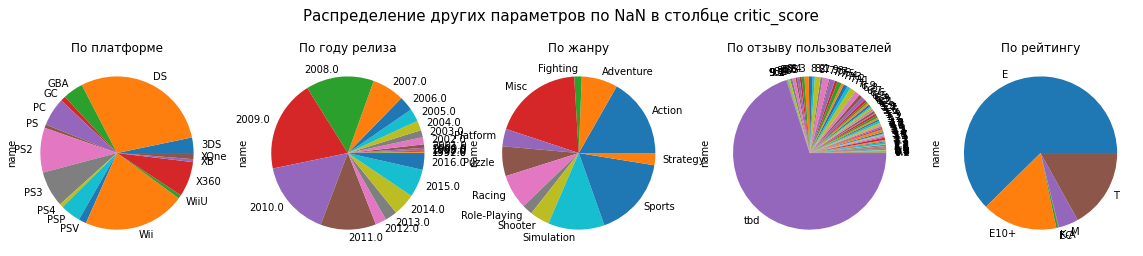

In [20]:
title = ['По платформе', 'По году релиза', 'По жанру', 'По отзыву пользователей', 'По рейтингу']
mis_data_check(unique_critic_score_check, 'critic_score', title)

- Пропуски в графе critic_score на 77% процентов совпадают с одновременными пропусками в столбцах user_score и rating;
- Оставшиеся пропуски коррелируют со значениями tbd в столбце user_score и категорией E в графе rating;
- Выраженной зависимости от других параметров не прослеживается;
- Скорее всего данные для critic_score, user_score и rating брались из одного источника.

In [21]:
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Столбец содержит целочисленные значения и Nan, если бы была необходимость использования более сложных моделей предсказания, можно было бы посмотреть по корреляциям, что сильнее всего влияет на оценку из оставшихся стол,цов и заполнить медиальных по этой переменной. Но здесь просто приводим к виду с плавающей запятой.

In [22]:
games['critic_score'] = (pd.to_numeric(games['critic_score'], errors='coerce')).astype('float32')

6. Столбец "user_score":

In [23]:
user_score_check=games.loc[games['user_score'].isna()]
print('Количество пропусков:',user_score_check.shape[0])
related_fails = games.query('user_score!= user_score & critic_score!=critic_score')
print('Количество совпадений с пропусками в critic_score:',related_fails.shape[0])
related_fails = games.query('user_score!= user_score &  rating!=rating')
print('Количество совпадений с пропусками в  rating:',related_fails.shape[0])
related_fails = games.query('critic_score!=critic_score &  user_score!= user_score &  rating!=rating')
print('Количество совпадений с пропусками в категориях critic_score, user_score, и rating:',related_fails.shape[0])
unique_user_score_check = user_score_check.query('~(critic_score!=critic_score &  user_score!= user_score &  rating!=rating)')
print('Количество оригинальных пропусков:',unique_user_score_check.shape[0])

Количество пропусков: 6700
Количество совпадений с пропусками в critic_score: 6662
Количество совпадений с пропусками в  rating: 6629
Количество совпадений с пропусками в категориях critic_score, user_score, и rating: 6620
Количество оригинальных пропусков: 80


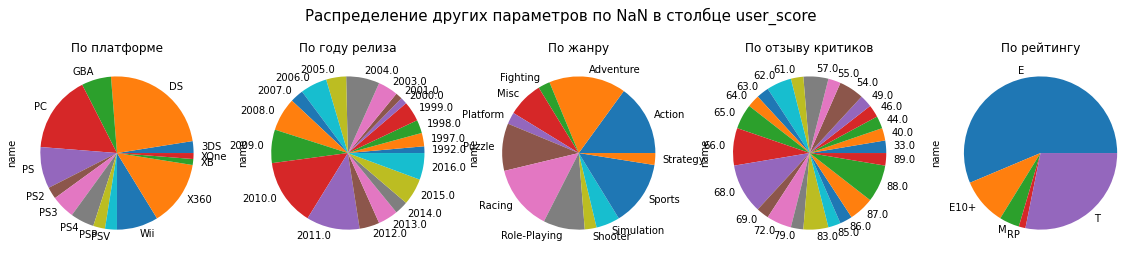

In [24]:
title = ['По платформе', 'По году релиза', 'По жанру', 'По отзыву критиков', 'По рейтингу']
mis_data_check(unique_user_score_check, 'user_score', title)

- Пропуски в графе critic_score на 99% процентов совпадают с одновременными пропусками в столбцах user_score и rating;
- Оставшиеся пропуски коррелируют со значениями категории E в графе rating;
- Выраженной зависимости от других параметров не прослеживается(в том числе и для critic_score);
- Скорее всего данные для critic_score, user_score и rating брались из одного источника.

In [25]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Столбец содержит дробные значения,Nan и tbd. Величина tbd(to be determined) означает, что рейтинг еще не определен, но должен быть определен. Так как при постановки задач просили обратить внимание на эту величину, построим как она коррелирует с другими стоблцами таблицы.

In [26]:
tbd_check = games[games['user_score']=='tbd']

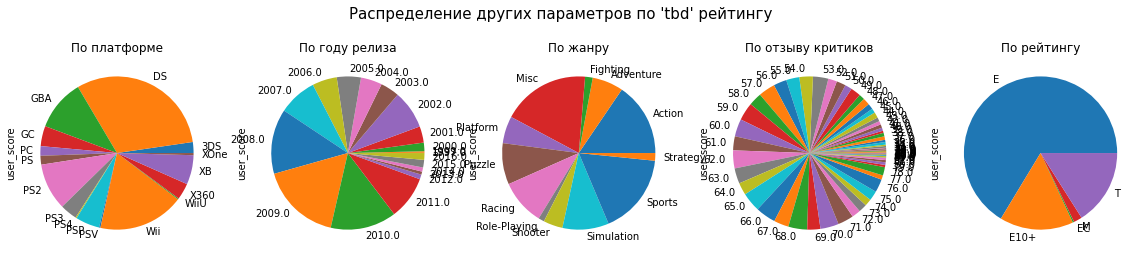

In [27]:
title = ['По платформе', 'По году релиза', 'По жанру', 'По отзыву критиков', 'По рейтингу']
cols = ['platform', 'year_of_release', 'genre', 'critic_score', 'rating']
fig, ax = plt.subplots(1, len(cols), figsize=(20, 7))
fig.subplots_adjust(bottom = 0.5) 
fig.suptitle("Распределение других параметров по 'tbd' рейтингу", fontsize=15)
for i in range(len(cols)):
    pie_chart =tbd_check.pivot_table(index=cols[i], values='user_score', aggfunc='count')
    pie_chart.plot(y= 'user_score',  kind="pie", ax=ax[i], legend=False, title = title[i]);
    ax[i].title 
plt.show()

 - В общем-то какого либо доминирования значений не наблюдается, кроме как для рейтинга. Забегая вперед следует отметить, что рейтинг E в принципе самый распространенных и результат не выходит за рамки очевидного;
 - Обращая внимание на диаграмму по году выпуска игры, можно заметить, что скорее всего рейтинг для игр с такой отметкой может быть вообще не определен, оставаясь в таком статусе;
 - Учитывая вышесказанное, вполне можно заменить значения 'tbd' на NaN и привести столбец к формату float32.

In [28]:
user_tbd_check=games.loc[games['user_score']=='tbd']
print('Количество tbd:',user_tbd_check.shape[0])
related_fails = games.query('user_score == "tbd" & critic_score!=critic_score')
print('Количество совпадений с пропусками в critic_score:',related_fails.shape[0])
related_fails = games.query('user_score == "tbd" &  rating!=rating')
print('Количество совпадений с пропусками в  rating:',related_fails.shape[0])
related_fails = games.query('critic_score!=critic_score &  user_score == "tbd" &  rating!=rating')
print('Количество совпадений с пропусками в категориях critic_score, user_score, и rating:',related_fails.shape[0])
unique_tbd_score_check = user_tbd_check.query('~(critic_score!=critic_score &  user_score == "tbd" &  rating!=rating)')
print('Количество оригинальных tbd без одновремененных совпадений:',unique_tbd_score_check.shape[0])

Количество tbd: 2424
Количество совпадений с пропусками в critic_score: 1342
Количество совпадений с пропусками в  rating: 50
Количество совпадений с пропусками в категориях critic_score, user_score, и rating: 46
Количество оригинальных tbd без одновремененных совпадений: 2378


Хотя целесообразно заполнить tbd Nan, однако эти данные не совпадают с пропусками по critic_score и rating и являются независимыми

In [29]:
games['user_score'].replace('tbd', np.nan, inplace=True)
games['user_score'] = (pd.to_numeric(games['user_score'], errors='coerce')).astype('float32')

7. Столбец "rating":

Столбец содержит данные о рейтингах игр в следущем виде:

In [30]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

* «E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов (ранее с 6 лет). Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера;
* «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови;
* «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики;
* «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику;
* «AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое;
* «RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу;
* «EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры;
* "K-A" ("Kids to Adults") раннее обозначение рейтинга «E».

Так как по сути рейтинги «E» и "K-A" одинаковые, возможно привести их в более новому значению «E»:

In [31]:
games['rating'].replace('K-A', 'E', inplace=True)

**Суммарные продажи во всех регионах в отдельном столбце**

Создадим столбец total_sales c суммарными продажами:

In [32]:
games['total_sales'] = games['na_sales']+games['eu_sales']+games['jp_sales']+games['other_sales']
moved_col = games.pop('total_sales')
games.insert(8, 'total_sales', moved_col)
games.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,31.38,NaN,NaN,NaN


In [33]:
games.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16711 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16461 non-null  float32
 3   genre            16711 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   total_sales      16712 non-null  float64
 9   critic_score     8135 non-null   float32
 10  user_score       7588 non-null   float32
 11  rating           9947 non-null   object 
dtypes: float32(3), float64(5), object(4)
memory usage: 1.5+ MB


Описание причин возникновения пропусков:
* Пропуски в столбцы name вызваны скорее всего неправильным вводом названия, так как их всего два и потому что название игры является основой для заполнения и составления этой таблицы;
* Пропуски в столбцы year_of_release и genre появились вследствии недостаточности информации об игре либо так же некорректным вводом;
* Пропуски в графе critic_score на 77% процентов совпадают с одновременными пропусками в столбцах user_score и rating;
* Оставшиеся пропуски коррелируют со значениями tbd в столбце user_score и категорией E в графе rating;
* Выраженной зависимости от других параметров не прослеживается;
* Пропуски в графе critic_score на 99% процентов совпадают с одновременными пропусками в столбце  rating;
* Оставшиеся пропуски коррелируют со значениями категории E в графе rating;
* Выраженной зависимости от других параметров не прослеживается(в том числе и для critic_score);
* Скорее всего данные для critic_score, user_score и rating брались из одного источника;
* Рейтинг ESRB является  создан для принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. Это значит, что его наличие необязательно для других регионов и только желательно, если игра ориентирована на Северо-Американский рынок.    

**Выводы:**

* Выполнена загрузка данных;
* Названия столбцов приведены к нижнему регистру;
* Для столбца "year_of_release" 17 значений восстановлены на основании названия игры;
* Для столбца "rating" значения более старого рейтинга "K-A" заменины на более новые значения «E»;
* Столбцы "year_of_release", "critic_score" приведены к формату float32;
* Столбец "user_score" приведен к формату float32;
* Значения 'tbd' в стоблце заменены на NaN;
* Добавлен столбец "total_sales" с суммарной выручкой по игре;
* Отмечено, что в таблице отдельно представлены игры с одинаковым названием, но вышедшие на разных платформах.

In [34]:
# Комментарий ревьюера
# Посмотрим, что осталось
temp = games.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16711 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16461 non-null  float32
 3   genre            16711 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   total_sales      16712 non-null  float64
 9   critic_score     8135 non-null   float32
 10  user_score       7588 non-null   float32
 11  rating           9947 non-null   object 
dtypes: float32(3), float64(5), object(4)
memory usage: 1.5+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'wwe Smackdown vs. Raw 2006' '¡Shin Chan Flipa en colores!' nan]
name : кол-во

### Исследовательский анализ данных:

**2.1 Сколько игр выпускалось в разные годы**

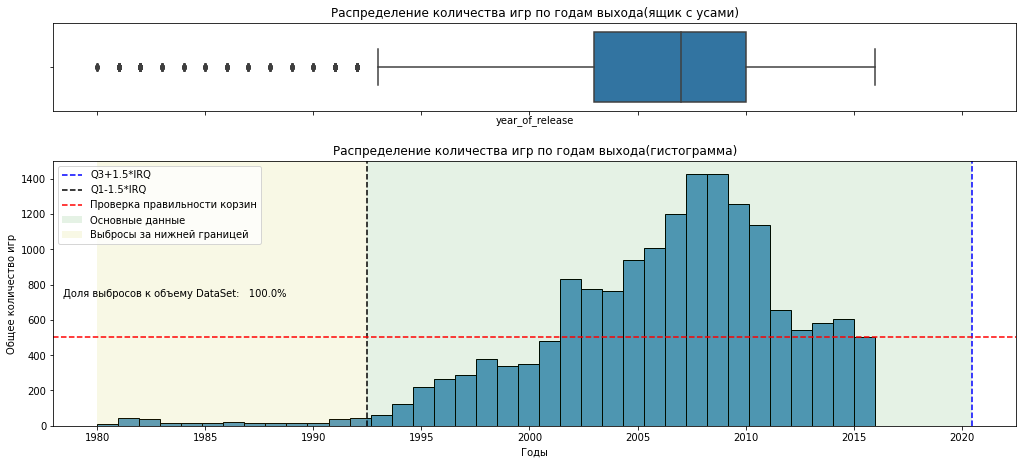

In [35]:
Q1 = games['year_of_release'].quantile(0.25)
Q3 = games['year_of_release'].quantile(0.75)
bins = games['year_of_release'].max()-games['year_of_release'].min()+1
IQR = Q3 - Q1
upper_lim = Q3 + 1.5*IQR
lower_lim = Q1 - 1.5*IQR
fig, (ax1, ax2) = plt.subplots(2,  sharex=True, figsize=(15, 7), gridspec_kw={"height_ratios": (.25, .75)})
fig.tight_layout(pad=4.0)
sns.boxplot(x=games['year_of_release'], ax=ax1)
sns.histplot(data = games, x = 'year_of_release',bins=int(bins), ax=ax2); 
ax2.axvline(x = upper_lim, color = 'b', linestyle='dashed', label = 'Q3+1.5*IRQ')
ax2.axvline(x = lower_lim, color = 'k', linestyle='dashed', label = 'Q1-1.5*IRQ')
ax2.axhline (y = (games['year_of_release']==2016).sum(), color = 'r', linestyle='dashed', label = 'Проверка правильности корзин')
ax2.axvspan(lower_lim, upper_lim, facecolor='g', alpha=0.1, label = 'Основные данные')
if upper_lim < games['year_of_release'].max():
    ax2.axvspan(upper_lim, games['year_of_release'].max(), facecolor='r', alpha=0.1, label = 'Выбросы за верхней границей')
if games['year_of_release'].min() < lower_lim:
    ax2.axvspan(games['year_of_release'].min(), lower_lim, facecolor='y', alpha=0.1, label = 'Выбросы за нижней границей')
text = 'Доля выбросов к объему DataSet:   '+ str(round(games.shape[0]/games.shape[0]*100, 2))+'%'
ax2.text(0.01, 0.5, text, horizontalalignment='left',  verticalalignment='center', transform = ax2.transAxes)
ax2.legend(loc='upper left')
ax2.set_title("Распределение количества игр по годам выхода(гистограмма)")
ax1.set_title("Распределение количества игр по годам выхода(ящик с усами)")
ax2.set_xlabel("Годы");
ax2.set_ylabel("Общее количество игр");
plt.show()

In [36]:
bins = games['year_of_release'].max()-games['year_of_release'].min()
bins

36.0

In [37]:
(games['year_of_release']==2016).sum()

502

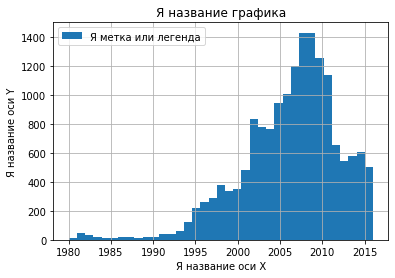

In [38]:
# Комментарий ревьюера 2
games.hist(column='year_of_release', bins=37)
plt.title('Я название графика')
plt.xlabel('Я название оси Х')
plt.ylabel('Я название оси Y')
plt.legend(['Я метка или легенда'])
plt.show()

In [39]:
print('Значение первого квартиля', Q1)
print('Значение третьего квартиля', Q3)
print('Уровень выбросов', lower_lim)

Значение первого квартиля 2003.0
Значение третьего квартиля 2010.0
Уровень выбросов 1992.5


Видно, что максимальное количество игр соответствует периоду с 2003 по 2010 год (IRQ диапазон). Выбросами, судя по диаграмме размаха, являются игры, выпущенные до 1994 года. С 2003 года до 2010 года (здесь половина всех значений) наблюдается резкий всплеск до максимального значения, после чего происходит снижение.

Для отображения результатов анализа был использован формальный инструмент - отсев по межквартильному размаху, пока не было иных гипотез и предложений будем считать, что для анализа следовало бы ограничится 1994 годом, как нижней границей выпуска игр.

**2.2 Посмотрить, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?**

In [40]:
platforms_check = (games.pivot_table(index='platform', values='total_sales', aggfunc='sum')
                   .reset_index()
                   .sort_values(by='total_sales', ascending=False)
                   .reset_index(drop=True))
platforms_check.head(10).T

,0,1,2,3,4,5,6,7,8,9
platform,PS2,X360,PS3,Wii,DS,PS,GBA,PS4,PSP,PC
total_sales,1255.77,971.42,939.16,907.51,806.12,730.86,317.85,314.14,294.05,259.52


Выделим топ-10 платформ для игр c максимальными суммарными продажами: PS2, X360, PS3, Wii, DS, PS,  GBA, PS4, PSP, PC

In [41]:
top_platforms = platforms_check['platform'][0:10].tolist()
games_to_plot = games[games['platform'].isin(top_platforms)]
games_to_plot['platform'].unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', 'GBA', 'PS4', 'PS', 'PC', 'PSP'],
      dtype=object)

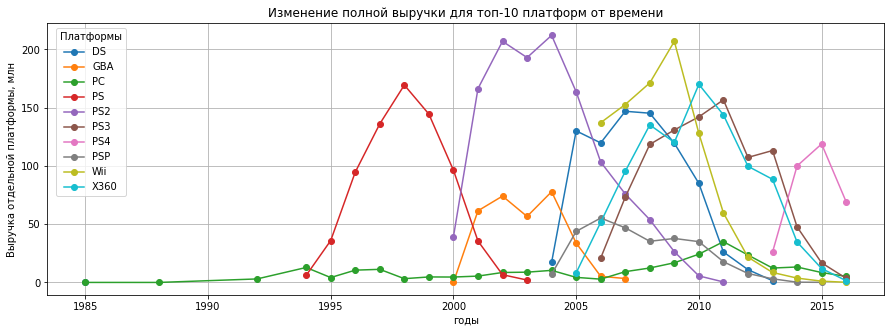

In [42]:
platforms_by_years_earn = games_to_plot.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
platforms_by_years_earn.plot(kind='line', figsize=(15,5),  style = 'o-', grid=True)
plt.title('Изменение полной выручки для топ-10 платформ от времени')
plt.legend(title="Платформы", loc="upper right", bbox_to_anchor=(0, 0, 0.1, 1))
plt.xlabel('годы')
plt.ylabel('Выручка отдельной платформы, млн');

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошая визуализация и правильно, что оси подписаны и есть название графика.</font>

Из графика интересно, что к 2016 году все top-10 платформ прошли максимум прибыли(стадия зрелости) и находятся в конце стадии спада (в рамках терминологии жизненного цикла продукта). Только PS4 пройдя максимум продаж активно приносит деньги. Отдельно следует отметить игры под компьютер, которые следует рассматривать отдельно.

Для формализовании ответа на вопрос о времени жизни платформы, будем считать что это разница с момента получения 0.02 доли от общей прибыли до 0.98. 

In [43]:
def interval_search (df_serial,lim):
    target = lim*df_serial.sum()
    cumul = df_serial.cumsum()
    for index, value in cumul.items():
        if value>=target:
            return index

In [44]:
def years_of_life (df, lower_lim, upper_lim):
    to_life = []
    for col in df.columns:
        yst  = interval_search(df[col], lower_lim)
        yfin = interval_search(df[col], upper_lim)
        pmax = df[col].max()
        ymax = df.index[df[col] == pmax].tolist()
        dt = yfin-yst
        to_life.append([col, yst, int(ymax[0]), yfin, dt])
    to_life = pd.DataFrame(to_life, columns=['Платформа', str(lower_lim)+' от прибыли', 'Максимум продаж', str(upper_lim)+' от прибыли', 'Время существования'])
    to_life.sort_values(by =str(lower_lim)+' от прибыли', inplace =True, ascending=False)
    return to_life

In [45]:
to_life = years_of_life(platforms_by_years_earn, 0.01, 0.99)
to_life['Время выхода на пик'] = to_life['Максимум продаж'] - to_life['0.01 от прибыли']
to_life['Время спада'] = to_life['0.99 от прибыли'] - to_life['Максимум продаж']
display(to_life)

,Платформа,0.01 от прибыли,Максимум продаж,0.99 от прибыли,Время существования,Время выхода на пик,Время спада
6,PS4,2013.0,2015,2016.0,3.0,2.0,1.0
5,PS3,2006.0,2011,2015.0,9.0,5.0,4.0
8,Wii,2006.0,2009,2013.0,7.0,3.0,4.0
9,X360,2006.0,2010,2015.0,9.0,4.0,5.0
0,DS,2004.0,2007,2012.0,8.0,3.0,5.0
7,PSP,2004.0,2006,2013.0,9.0,2.0,7.0
1,GBA,2001.0,2004,2007.0,6.0,3.0,3.0
4,PS2,2000.0,2004,2009.0,9.0,4.0,5.0
3,PS,1995.0,1998,2002.0,7.0,3.0,4.0
2,PC,1992.0,2011,2016.0,24.0,19.0,5.0


Исключим из рассмотрения PC и PS4, и определим средний срок существования отдельной платформы по данным из top-10

In [46]:
print ('Среднее время жизни платформы из top-10:',to_life.drop([6, 2], axis=0)['Время существования'].mean())
print ('Среднее время выхода на пик продаж платформы из top-10:',to_life.drop([6, 2], axis=0)['Время выхода на пик'].mean())
print ('Среднее время спада платформы из top-10:',to_life.drop([6, 2], axis=0)['Время спада'].mean())

Среднее время жизни платформы из top-10: 8.0
Среднее время выхода на пик продаж платформы из top-10: 3.375
Среднее время спада платформы из top-10: 4.625


Выглядит вполне логично, что время спада дольше(4.625 лет), чем время выхода на пик продаж (3.375)

Можно посмотреть, что происходит для всех платформ, однако исключим сначала из расмотрения платформы в соответствии с выводами предыдущего пункта исследования (до 1994 года). В этом случае для анализа следует исключить и все соответствующие платформы где эти игры выпускались + pc.

In [47]:
trash_pl_list=games['platform'].loc[games['year_of_release']<=1994].unique().tolist()
trash_pl_list += ['PC']
all_platform = (games.loc[~games['platform'].isin(trash_pl_list)]
                .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum'))
all_platform.tail(3)

platform,3DS,DC,GBA,GC,N64,PCFX,PS2,PS3,PS4,PSP,PSV,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,
2014.0,43.76,NaN,NaN,NaN,NaN,NaN,NaN,47.76,100.00,0.24,11.90,NaN,NaN,3.75,22.03,34.74,NaN,54.07
2015.0,27.78,NaN,NaN,NaN,NaN,NaN,NaN,16.82,118.90,0.12,6.25,NaN,NaN,1.14,16.35,11.96,NaN,60.14
2016.0,15.14,NaN,NaN,NaN,NaN,NaN,NaN,3.60,69.25,NaN,4.25,NaN,NaN,0.18,4.60,1.52,NaN,26.15


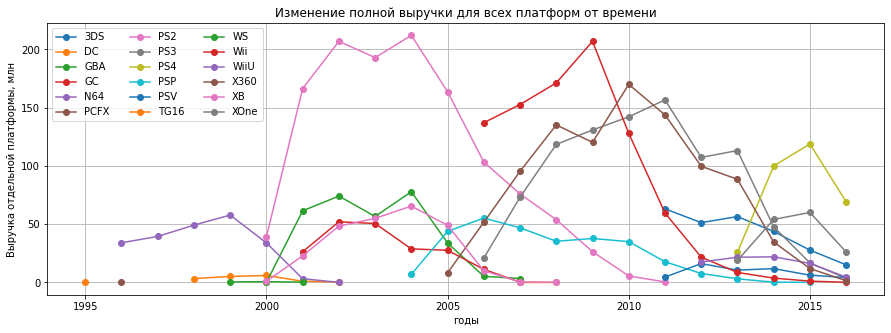

In [48]:
all_platform.plot(kind='line', figsize=(15,5),  style = 'o-', grid=True)
plt.title('Изменение полной выручки для всех платформ от времени')
plt.xlabel('годы')
plt.ylabel('Выручка отдельной платформы, млн')
plt.legend(title="Платформы", loc="upper right", bbox_to_anchor=(0, 0, 0.1, 1))
plt.legend(ncol=3);

По графику в том числе можно отметить, что платформы можно разделить на три группы: 
 - "старые" - основное количество игр приходится на годы до 1995;
 - "устаревшие"  - основное количество игр(и доход) приходится на годы с 2000 до 2010;
 - "современные" - основное количество игр(и доход) приходится на годы с 2007 до 2016.

Исключим из выборки платформы, которые на 2016 год еще точно в активной стадии продаж - XOne, 3DS, PS4 (прибыль больше 10 млн.), а так же выбросы от отсееяных ранее платформ (TG16, WS и PCFX)

In [49]:
all_platform.drop(['XOne', '3DS', 'PS4', 'TG16', 'PCFX', 'WS'], axis=1, inplace=True)

In [50]:
to_life = years_of_life(all_platform, 0.01, 0.99)
to_life['Время выхода на пик'] = to_life['Максимум продаж'] - to_life['0.01 от прибыли']
to_life['Время спада'] = to_life['0.99 от прибыли'] - to_life['Максимум продаж']
display(to_life)

,Платформа,0.01 от прибыли,Максимум продаж,0.99 от прибыли,Время существования,Время выхода на пик,Время спада
9,WiiU,2012.0,2014,2016.0,4.0,2.0,2.0
7,PSV,2011.0,2012,2016.0,5.0,1.0,4.0
5,PS3,2006.0,2011,2015.0,9.0,5.0,4.0
8,Wii,2006.0,2009,2013.0,7.0,3.0,4.0
10,X360,2006.0,2010,2015.0,9.0,4.0,5.0
6,PSP,2004.0,2006,2013.0,9.0,2.0,7.0
1,GBA,2001.0,2004,2007.0,6.0,3.0,3.0
2,GC,2001.0,2002,2006.0,5.0,1.0,4.0
11,XB,2001.0,2004,2006.0,5.0,3.0,2.0
4,PS2,2000.0,2004,2009.0,9.0,4.0,5.0


In [51]:
print ('Среднее время жизни платформы из top-10:',to_life['Время существования'].mean())
print ('Среднее время выхода на пик продаж платформы из top-10:',to_life['Время выхода на пик'].mean())
print ('Среднее время спада платформы из top-10:',to_life['Время спада'].mean())

Среднее время жизни платформы из top-10: 6.416666666666667
Среднее время выхода на пик продаж платформы из top-10: 2.75
Среднее время спада платформы из top-10: 3.6666666666666665


Интересно, что среднее время везде сократилось, скорее всего это связано с тем, что платформы с меньшей прибылью имеют более короткий срок существования на рынке.

**Результаты и Выводы**

* В top-10 платформ по доходу входят: 'Wii', 'DS', 'X360', 'PS3', 'PS2', 'GBA', 'PS4', 'PS', 'PC', 'PSP';
* К 2016 году все top-10 платформ прошли максимум прибыли(стадия зрелости) и находятся в конце стадии спада (в рамках терминологии жизненного цикла продукта). Только PS4 пройдя максимум продаж активно приносит деньги;
* Среднее время жизни платформы из top-10: 8.0 лет;
* Среднее время выхода на пик продаж платформы из top-10: 3.375 лет;
* Среднее время спада платформы из top-10: 4.625;
* Можно выделить следующие классы платформ:

  - "старые" - основное количество игр приходится на годы до 1995;
  - "устаревшие"  - основное количество игр(и доход) приходится на годы с 2000 до 2010;
  - "современные" - основное количество игр(и доход) приходится на годы с 2007 до 2016.
* На 2016 год еще точно в активной стадии продаж - XOne, 3DS, PS4 (прибыль больше 10 млн.);
* Среднее время жизненного цикла для всех платформ меньше относительно top-10, что скорее всего это связано с тем, что платформы с меньшей прибылью имеют более короткий срок существования на рынке.

**2.3 Взять данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год;**

Если обратиться к уже построенной диаграмме по доходу для платформ, можно отметить следующие особенности, описанные ранее:
*  все платформы деляться на три группы, при этом влияние двух первых можно пренебречь, так как они фактически закончили свое существование;
*  в оставшейся группе "современные", все платформы находятся на стадии спада.
  
В этой связи показательным периодом может считаться период от начала спада продаж в группе "современные" платформы(для всех платформ) и до начала появления "новейших" (PS4 и т.д.)   - что соответствует  2011 году.

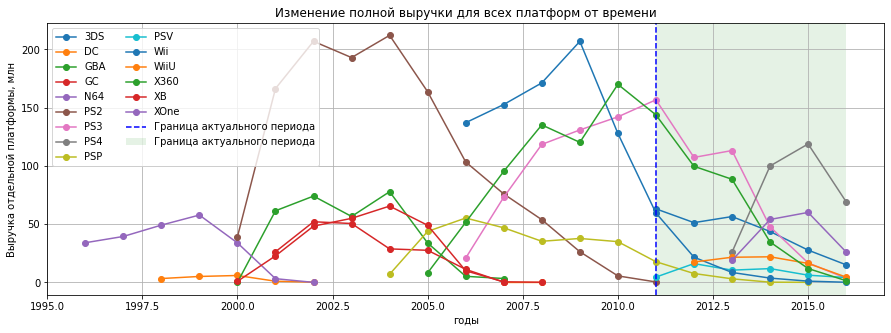

In [52]:
all_platform = (games.loc[~games['platform'].isin(trash_pl_list+['TG16', 'PCFX', 'WS'])]
                .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum'))
all_platform.plot(kind='line', figsize=(15,5),  style = 'o-', grid=True)
plt.axvline(x = 2011, color = 'b', linestyle='dashed', label = 'Граница актуального периода')
plt.axvspan(2011, 2016, facecolor='g', alpha=0.1, label = 'Граница актуального периода')
plt.title('Изменение полной выручки для всех платформ от времени')
plt.xlabel('годы')
plt.ylabel('Выручка отдельной платформы, млн')
plt.legend(loc='upper left')
plt.legend(ncol=2);

In [53]:
actual_games = games.query('year_of_release >= 2011')
actual_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4022 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             4022 non-null   object 
 1   platform         4022 non-null   object 
 2   year_of_release  4022 non-null   float32
 3   genre            4022 non-null   object 
 4   na_sales         4022 non-null   float64
 5   eu_sales         4022 non-null   float64
 6   jp_sales         4022 non-null   float64
 7   other_sales      4022 non-null   float64
 8   total_sales      4022 non-null   float64
 9   critic_score     1812 non-null   float32
 10  user_score       2032 non-null   float32
 11  rating           2314 non-null   object 
dtypes: float32(3), float64(5), object(4)
memory usage: 361.4+ KB


После отсева данные оказали значительно "чище". Пропуски только для оценок и рейтингов.

**2.4 Какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ**

Отобразим доход платформ в порядке убывания на 2016 год

In [54]:
actual_platforms_check = (actual_games.pivot_table(index='platform', values='total_sales', aggfunc='sum')
                   .reset_index()
                   .sort_values(by='total_sales', ascending=False)
                   .reset_index(drop=True))
print('--------------------------Таблица по суммарным продажам платформ---------------------')
display(actual_platforms_check.head(14).T)
actual_platform = (actual_games.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum'))
print('--------------------------Продажи платформ по годам----------------------------------')
actual_platform

--------------------------Таблица по суммарным продажам платформ---------------------


,0,1,2,3,4,5,6,7,8,9,10,11
platform,PS3,X360,PS4,3DS,XOne,PC,Wii,WiiU,PSV,DS,PSP,PS2
total_sales,445.56,380.38,314.14,257.81,159.32,98.03,95.02,82.19,53.81,38.73,29.01,0.45


--------------------------Продажи платформ по годам----------------------------------


platform,3DS,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,,
2011.0,63.20,26.18,35.03,0.45,156.78,NaN,17.82,4.63,59.65,NaN,143.84,NaN
2012.0,51.36,11.01,23.57,NaN,107.35,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013.0,56.57,1.54,12.38,NaN,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014.0,43.76,NaN,13.28,NaN,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015.0,27.78,NaN,8.52,NaN,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016.0,15.14,NaN,5.25,NaN,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


Из таблиц можно сделать вывод, что хотя PS2 попала в актуальный временной диапазон, фактически продажи прекратились как раз в 2011 году (всего 7 записей). Платформа DS будет снижать "оптимизм" оценки ввиду того, что с 2014 года не было продаж, но у нас есть и вновь появившиемся платформы (XOne и PS4), поэтому она не выходит за рамки жизненного цикла и ее можно оставить при анализе, тоже самое о PSP.

In [55]:
actual_games = actual_games.loc[actual_games['platform']!='PS2']

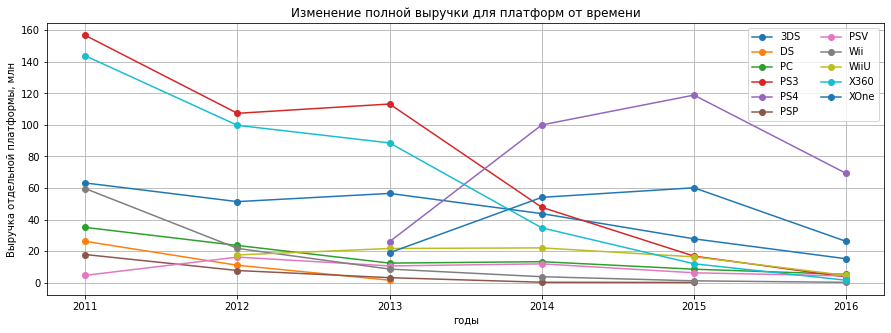

In [56]:
actual_platforms = actual_games.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
actual_platforms.plot(kind='line', figsize=(15,5),  style = 'o-', grid=True)
plt.title('Изменение полной выручки для платформ от времени')
plt.xlabel('годы')
plt.ylabel('Выручка отдельной платформы, млн');
plt.legend(ncol=2);

**Результаты и Выводы**

- Распределение по сумме продаж платформами следующее в порядке убывания: PS3, X360, PS4, 3DS, XOne, PC, Wii, WiiU, PSV, DS, PSP;
- Из них на стадии спада: PS3, X360, 3DS, PC, Wii, WiiU, PSV, DS, PSP;
- Относительно PS4 и XOne, сложно судить, потому что год неполный;
- В качестве наиболее прибыльных можно остановится на PS4 и XOne и 3DS, хотя последняя и падает, но у нее очень долгая относительно других продолжительность существования на рынки и скорость спада опять же относительно других самая маленькая;
- "Длинная" история 3DS так же способствует хорошей прогнозируемости результатов (доход будет, но стабильно невысокий, но будет).

**2.5 Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат**

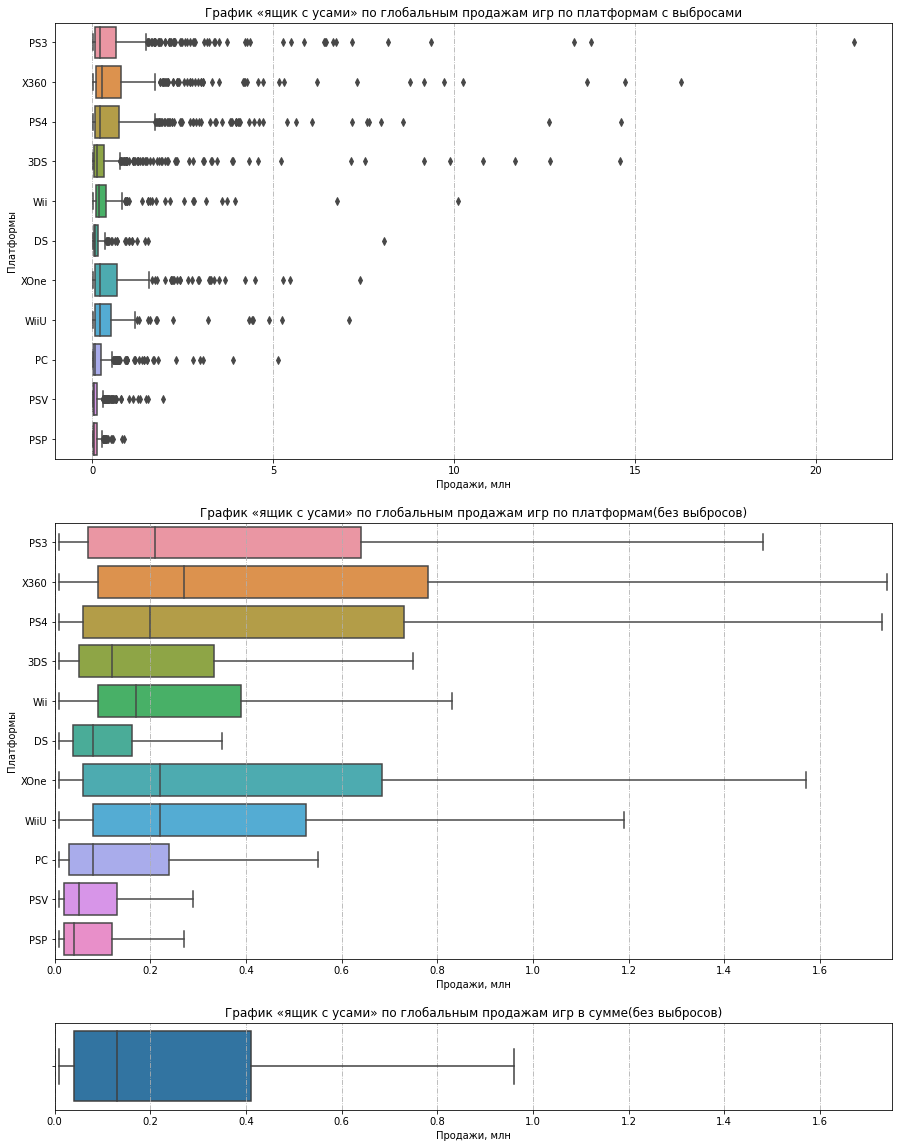

In [57]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15, 20), gridspec_kw={"height_ratios": (10/23, 10/23, 2/23)})
sns.boxplot(x='total_sales', y='platform', data=actual_games, ax=ax1).set(ylabel='Платформы', xlabel = "Продажи, млн",
                                                                               title = "График «ящик с усами» по глобальным продажам игр по платформам c выбросами")
ax1.grid(axis = 'x', linestyle='-.')
sns.boxplot(x='total_sales', y='platform', data=actual_games, ax=ax2, showfliers = False).set(xlim=(0, 1.75), ylabel='Платформы', xlabel = "Продажи, млн",
                                                                               title = "График «ящик с усами» по глобальным продажам игр по платформам(без выбросов)")
ax2.grid(axis = 'x', linestyle='-.')
sns.boxplot(x='total_sales', data=actual_games, ax=ax3, showfliers = False).set(xlim=(0, 1.75), xlabel = "Продажи, млн",
                                                                               title = "График «ящик с усами» по глобальным продажам игр в сумме(без выбросов)")
ax3.grid(axis = 'x', linestyle='-.')
plt.show()

Добавим описание для сгруппированных по названию платформы данных о продажах:

In [58]:
to_describe = []
for col in actual_games['platform'].unique():
    column = actual_games['total_sales'].loc[actual_games['platform']==col].describe().tolist()
    to_describe.append(column)
to_describe = pd.DataFrame(to_describe).T
to_describe.columns=actual_games['platform'].unique()
to_describe.index = actual_games['total_sales'].loc[actual_games['platform']==col].describe().index
to_describe['in_total'] = actual_games['total_sales'].describe().tolist()
to_describe

,PS3,X360,PS4,3DS,Wii,DS,XOne,WiiU,PC,PSV,PSP,in_total
count,707.000000,498.000000,392.000000,512.000000,197.000000,184.000000,247.000000,147.000000,390.000000,429.000000,312.000000,4015.000000
mean,0.630212,0.763815,0.801378,0.503535,0.482335,0.210489,0.645020,0.559116,0.251359,0.125431,0.092981,0.486675
std,1.452228,1.637090,1.609456,1.441271,1.059069,0.636579,1.036139,1.058836,0.505085,0.212341,0.116731,1.220416
min,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,0.070000,0.090000,0.060000,0.050000,0.090000,0.037500,0.060000,0.080000,0.030000,0.020000,0.020000,0.040000
50%,0.210000,0.270000,0.200000,0.120000,0.170000,0.080000,0.220000,0.220000,0.080000,0.050000,0.040000,0.130000
75%,0.640000,0.780000,0.730000,0.332500,0.390000,0.162500,0.685000,0.525000,0.240000,0.130000,0.120000,0.410000
max,21.050000,16.270000,14.630000,14.600000,10.120000,8.060000,7.390000,7.090000,5.140000,1.960000,0.870000,21.050000


**Результаты и Выводы**

* **Для общих продаж(in total):** Медиана составляет 130 тыс, среднее - 486 тыс. Первый квартиль - 40 тыс, третий квартиль - 410 тыс. Стандартное отклонение - 1.22 млн. Максимальное Данные значительно смещены вправо - среднее больше чем медиана;
* **Выручка по каждой платформе:** Платформы с самым широким распределением суммы отдельных продаж - 'X360', 'PS3', 'PS4', 'XOne'. Минимальный разброс данных характерен для платформ 'PSV', 'PSP' и 'DS'. Максимальное значение медианы у 'X360', минимальное  - 'PSP'
* Следует рекомендовать X360 и PS4 платформы.

**2.6 Посмотрить, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулировать выводы**

При выборе платформы можно пойти двумя путями:
* выбрать для рассмотрения платформу с самыми чистыми данными;
* выбрать наиболее перспективную платформу для продаж.

  В данном случае предлагаю исследовать самую популярную(перспективную) на текущий момент платформу PS4.

In [59]:
ps4_data = actual_games.query('platform == "PS4"')

In [60]:
# Комментарий ревьюера и не только
print('Исходное количество данных', len(ps4_data))
print('Данные для исследовования отзывов критиков:', len(ps4_data.query("(critic_score == critic_score)")))
print('Данные для исследовования отзывов пользователей:', len(ps4_data.query("(user_score == user_score)")))

Исходное количество данных 392
Данные для исследовования отзывов критиков: 252
Данные для исследовования отзывов пользователей: 257


В итоге около 64 % данных о PS4 подходят для анализа.

In [61]:
cols_ps4 = ['total_sales' ,'critic_score', 'user_score']

Строить корреляции есть смысл для данных без выбросов, отсеем по IRQ верхную границу

In [62]:
Q1 = ps4_data['total_sales'].quantile(0.25)
Q3 = ps4_data['total_sales'].quantile(0.75)
IQR = Q3 - Q1
upper_lim = Q3 + 1.5*IQR
print ("Верхняя граница распределения млн.:", upper_lim)

Верхняя граница распределения млн.: 1.7349999999999999


In [63]:
#ps4_data_dist = ps4_data.loc[ps4_data['total_sales']<=upper_lim]
#print('Оставшееся количество записей:',ps4_data_dist.shape[0])
#ps4_data_dist = ps4_data

In [64]:
# Комментарий ревьюера
#ps4_data.total_sales.sum(), ps4_data_dist.total_sales.sum()

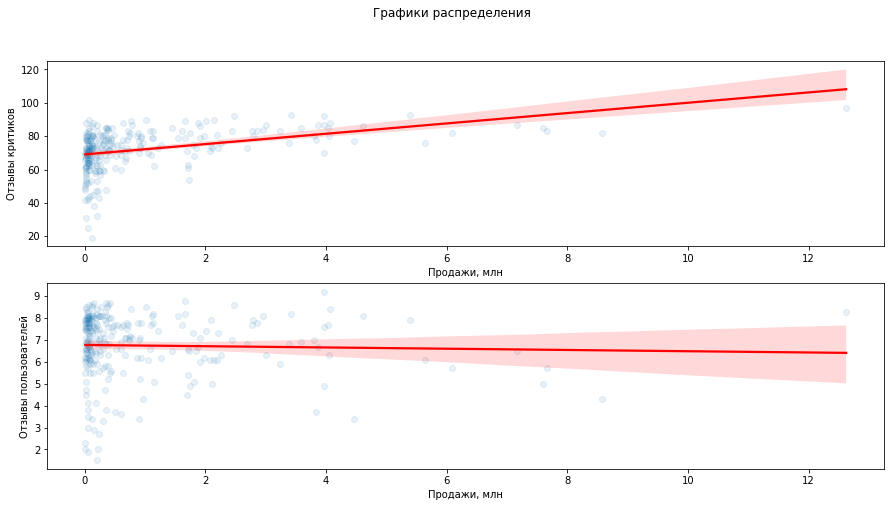

In [65]:
fig, ax = plt.subplots(2, 1, figsize=(15, 7.5))
fig.suptitle('Графики распределения')
sns.regplot(x='total_sales', y='critic_score', data=ps4_data, ax = ax[0], scatter_kws = {'alpha': 0.1}, line_kws={'color':'red'}).set(xlabel = 'Продажи, млн', ylabel = 'Отзывы критиков');
sns.regplot(x='total_sales', y='user_score', data=ps4_data, ax=ax[1], scatter_kws = {'alpha': 0.1}, line_kws={'color':'red'}).set(xlabel = 'Продажи, млн', ylabel = 'Отзывы пользователей');
plt.show()

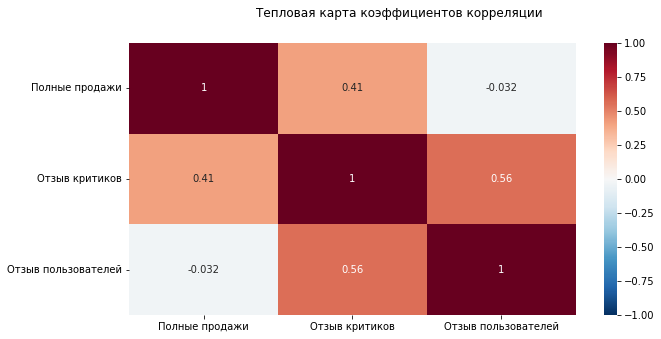

In [66]:
x_axis_labels = ['Полные продажи', 'Отзыв критиков', 'Отзыв пользователей'] 
y_axis_labels = x_axis_labels 
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(
    ps4_data[cols_ps4].corr(),        
    cmap='RdBu_r',                # задаёт цветовую схему
    annot=True,                   # рисует значения внутри ячеек
    vmin=-1, vmax=1,              # указывает начало цветовых кодов от -1 до 1.
    xticklabels=x_axis_labels, 
    yticklabels=y_axis_labels
);
fig.suptitle('Тепловая карта коэффициентов корреляции');

**Результаты и Выводы**

* Отзывы критиков оказывают чуть-ниже среднего влияние на продажи. Коэффициент корреляции 0.41;
* Отзывы пользователей вообще не влияют на продажи, коэффициент корреляции -0.032;
* Интересно, что отзывы критиков и зрителей как раз между собой коррелируют, коэффициент корреляции чуть выше среднего 0.56.

**2.7 Соотнести выводы с продажами игр на других платформах**

In [67]:
def corr_analiz (df, platf):
    data = df.query('platform == @platf')
    to_user = data['total_sales'].corr(data['user_score'])
    to_critic=data['total_sales'].corr(data['critic_score'])
    return to_user, to_critic

In [68]:
to_score = []
for col in actual_games['platform'].unique():
    inf_score = corr_analiz (actual_games, col)
    to_score.append(inf_score)
to_score = pd.DataFrame(to_score).T
to_score.columns=actual_games['platform'].unique()
to_score.index = ['user_score_infl', 'critic_score_infl']
to_score

,PS3,X360,PS4,3DS,Wii,DS,XOne,WiiU,PC,PSV,PSP
user_score_infl,0.013221,0.038918,-0.031957,0.222078,0.145504,0.281029,-0.068925,0.400219,-0.048413,0.013489,0.010036
critic_score_infl,0.381991,0.391253,0.406568,0.348740,0.292269,0.261166,0.416998,0.348380,0.313893,0.131763,0.358138


Влияние отзывов пользователей и критиков

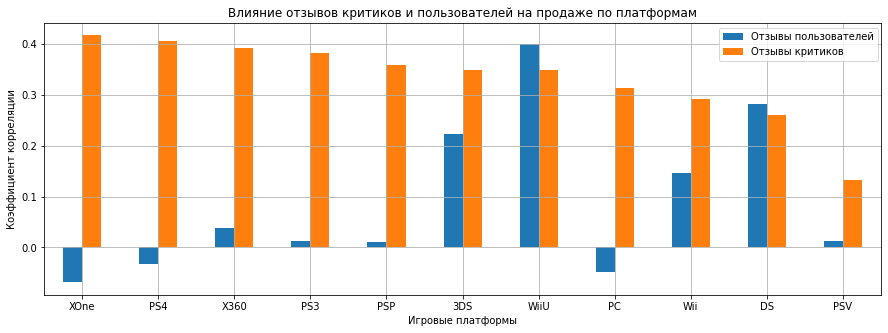

In [69]:
to_score.T.sort_values(by='critic_score_infl', ascending=False).plot.bar(rot=0, figsize=(15,5))
plt.title('Влияние отзывов критиков и пользователей на продаже по платформам')
plt.xlabel('Игровые платформы')
plt.ylabel('Коэффициент корреляции')
plt.legend(['Отзывы пользователей', 'Отзывы критиков'],
          loc="upper left",
          bbox_to_anchor=(0.8, 0, 0.1, 1))
plt.grid()
plt.show()

Выведем визуальную информацию о корреляции для top-5 платформ по продажам

In [70]:
top5_platform_list=actual_platforms_check['platform'][0:5]

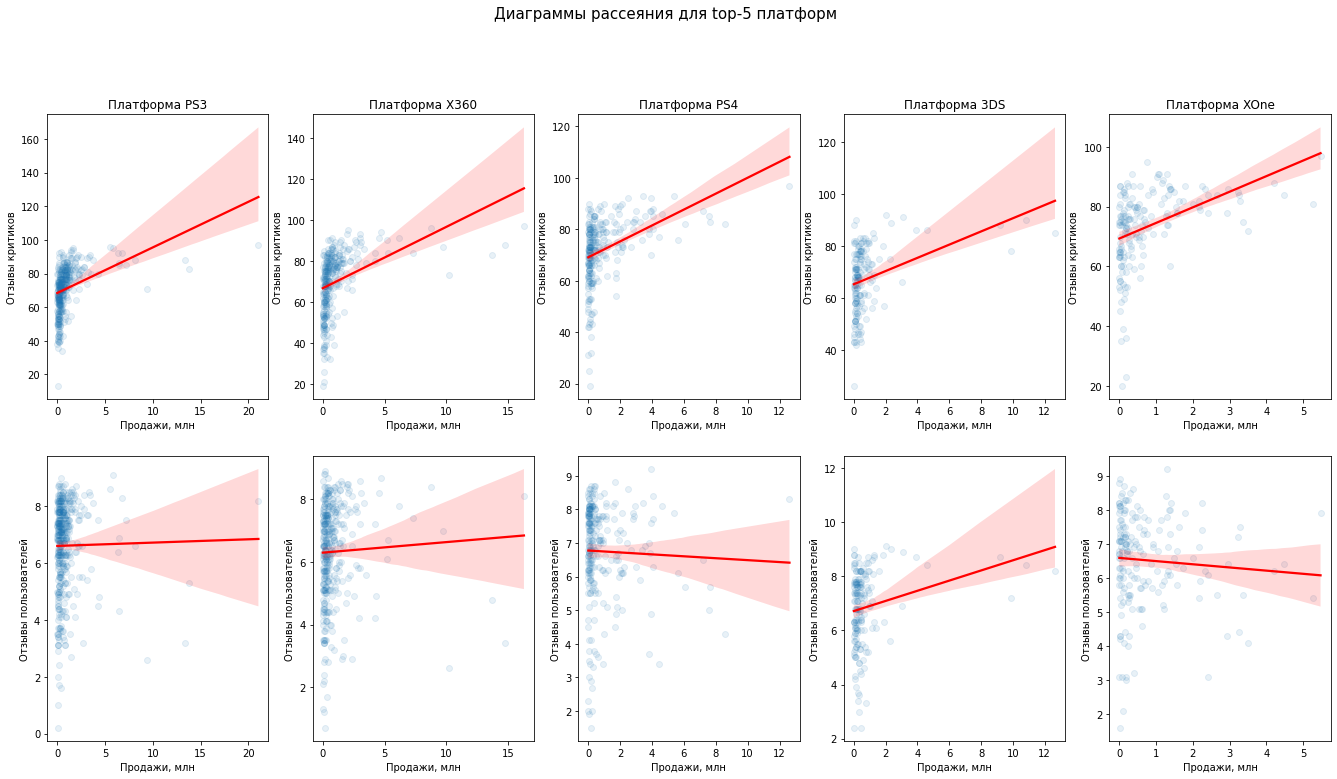

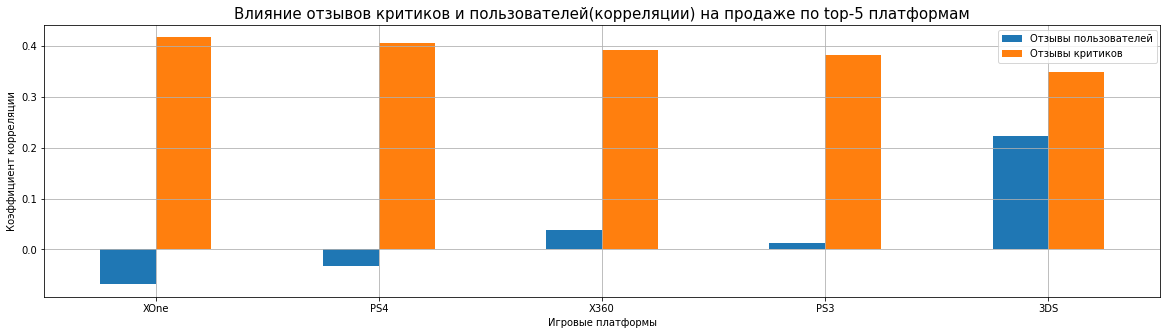

Таблица коэфэфициентов корреляций(по отзывам - пользователей/критиков) для top-5 платформ по продажам


,PS3,X360,PS4,3DS,XOne
user_score_infl,0.013221,0.038918,-0.031957,0.222078,-0.068925
critic_score_infl,0.381991,0.391253,0.406568,0.348740,0.416998


In [71]:
fig, ax = plt.subplots(2, len(top5_platform_list), figsize=(23, 15))
fig.subplots_adjust(bottom = 0.3) 
fig.suptitle("Диаграммы рассеяния для top-5 платформ ", fontsize=15)
for i in range(len(top5_platform_list)):
    platf = top5_platform_list[i]
    data = actual_games.query('platform == @platf')
    to_user = data['total_sales'].corr(data['user_score'])
    to_critic=data['total_sales'].corr(data['critic_score'])
    #fig.suptitle('Графики распределения для платформы ' + str(platf))
    ax[0][i].set_title("Платформа "+str(platf))
    sns.regplot(x='total_sales', y='critic_score', data=data, ax = ax[0][i], label='huy',  scatter_kws = {'alpha': 0.1}, line_kws={'color':'red'}).set(xlabel = 'Продажи, млн', ylabel = 'Отзывы критиков');
    sns.regplot(x='total_sales', y='user_score', data=data, ax = ax[1][i], scatter_kws = {'alpha': 0.1}, line_kws={'color':'red'}).set(xlabel = 'Продажи, млн', ylabel = 'Отзывы пользователей');
plt.show()
to_score[top5_platform_list].T.sort_values(by='critic_score_infl', ascending=False).plot.bar(rot=0, figsize=(20,5))
plt.title('Влияние отзывов критиков и пользователей(корреляции) на продаже по top-5 платформам', fontsize=15)
plt.xlabel('Игровые платформы')
plt.ylabel('Коэффициент корреляции')
plt.grid()
plt.legend(['Отзывы пользователей', 'Отзывы критиков'],
          loc="upper left",
          bbox_to_anchor=(0.85, 0, 0.1, 1))
plt.show()
print('Таблица коэфэфициентов корреляций(по отзывам - пользователей/критиков) для top-5 платформ по продажам')
to_score[top5_platform_list]

**Результаты и Выводы**

* Влияние мнения критиков всегда более значительно, чем мнения пользователей;
* Влияние мнения критиков варьируется от 0.51 для PS3 до 0.178662 для PSV;
* Мнение пользователей более неоднозначное: максимальное влияние для Wii(и сопоставимо с мнение критиков): 0.165039, практически не оказывает влияние для PC, PS4, XOne, PSV и DS;
* Для PSP положительные оценки отрицательно влияют на продажи;
* Для пяти платформ по продажам наблюдается устойчивая корреляция отзывов критиков и объемов продаж. Коэффициент корреляции от 0.42(XOne) до 0.35(у 3DS);
* Связь продаж с отзывами зрителей противоречива и находится в диапазоне от отрицательной велчиины -0.1(XOne) до 0.22(3DS);
* При этом только для платформы 3DS она чувствительна, в других случаях ей можно пренебречь.


**2.8 Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

После определения актуального периода весь дальнейший анализ проводим по продажам суммарно за этот период. Для прибыльности нужны стабильные жанры, по-этому добавим сравнение медианных продаж, проиллюстрировав их диаграммами размаха (Олег спасибо 😄)

In [72]:
actual_genre_check = (actual_games.pivot_table(index='genre', values='total_sales', aggfunc='median')
                   .reset_index()
                   .sort_values(by='total_sales', ascending=False)
                   .reset_index(drop=True))
print('--------------------------Таблица по суммарным продажам по жанрам---------------------')
display(actual_genre_check.head(14).T)

--------------------------Таблица по суммарным продажам по жанрам---------------------


,0,1,2,3,4,5,6,7,8,9,10,11
genre,Shooter,Sports,Platform,Fighting,Racing,Role-Playing,Action,Misc,Simulation,Strategy,Puzzle,Adventure
total_sales,0.41,0.2,0.185,0.18,0.16,0.15,0.13,0.13,0.11,0.08,0.05,0.03


В порядке убывания средней доходности жанры расположены следующим образов: Shooter	Sports	Platform	Fighting	Racing	Role-Playing	Action	Misc	Simulation	Strategy	Puzzle	Adventure.

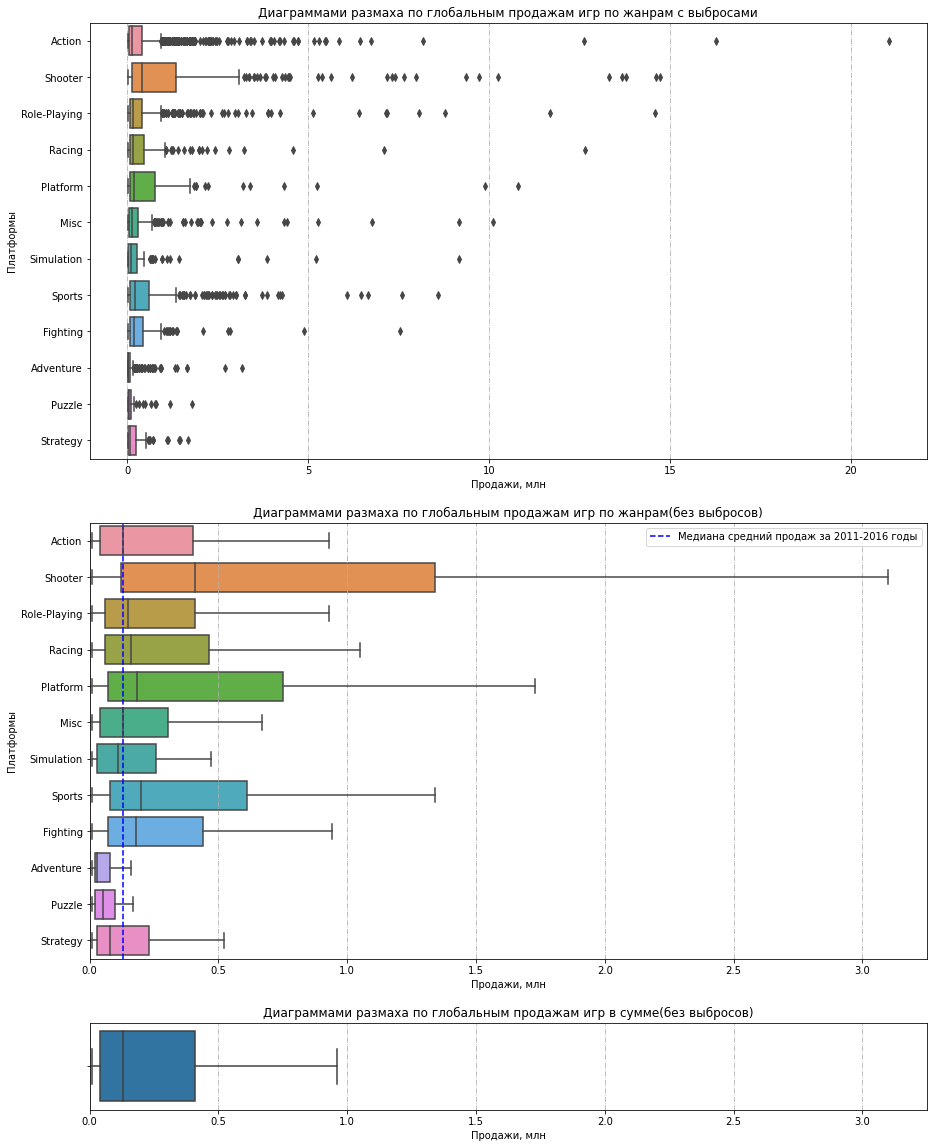

In [73]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15, 20), gridspec_kw={"height_ratios": (10/23, 10/23, 2/23)})
sns.boxplot(x='total_sales', y='genre', data=actual_games, ax=ax1).set(ylabel='Платформы', xlabel = "Продажи, млн",
                                                                               title = "Диаграммами размаха по глобальным продажам игр по жанрам c выбросами")
ax1.grid(axis = 'x', linestyle='-.')
sns.boxplot(x='total_sales', y='genre', data=actual_games, ax=ax2, showfliers = False).set(xlim=(0, 3.25), ylabel='Платформы', xlabel = "Продажи, млн",
                                                                               title = "Диаграммами размаха по глобальным продажам игр по жанрам(без выбросов)")
ax2.grid(axis = 'x', linestyle='-.')
sns.boxplot(x='total_sales', data=actual_games, ax=ax3, showfliers = False).set(xlim=(0, 3.25), xlabel = "Продажи, млн",
                                                                               title = "Диаграммами размаха по глобальным продажам игр в сумме(без выбросов)")
ax2.axvline(x = actual_games['total_sales'].median(), color = 'b', linestyle='dashed', label = 'Медиана средний продаж за 2011-2016 годы') 
ax2.legend()
ax3.grid(axis = 'x', linestyle='-.')

plt.show()

Оценим изменение доли игр по жанру на рынке за 2011-2016 годы.

In [74]:
count_genre_platform = (actual_games.pivot_table(index='year_of_release', columns='genre', values='name', aggfunc='count'))
colns = count_genre_platform.columns
count_genre_platform['name'] = count_genre_platform[list(count_genre_platform.columns)].sum(axis=1)
count_genre_platform[colns] = count_genre_platform[colns].div(count_genre_platform['name'], axis=0)

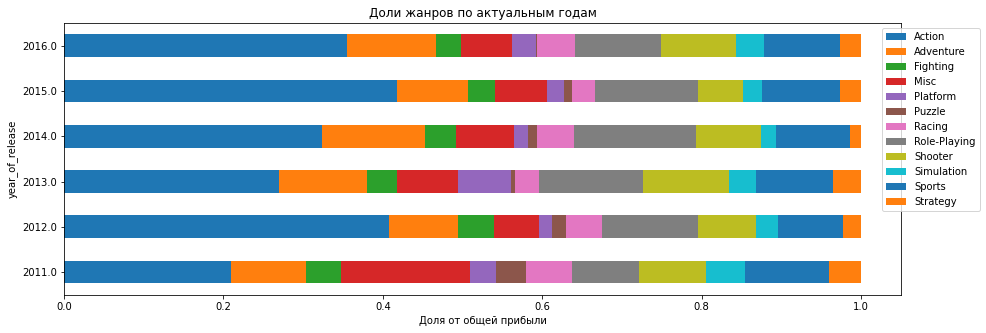

In [75]:
count_genre_platform[colns].reset_index().plot(x='year_of_release', kind = 'barh',  stacked = True,  title = 'Доли жанров по актуальным годам',  mark_right = True, figsize=(15,5));
plt.xlabel('Доля от общей прибыли')
plt.legend(bbox_to_anchor=(1.1, 1), loc="upper right");

**Результаты и Выводы**

* В порядке убывания средней доходности жанры расположены следующим образов: Shooter	Sports	Platform	Fighting	Racing	Role-Playing	Action	Misc	Simulation	Strategy	Puzzle	Adventure;
* Для следующих жанров средняя доходность выше средней:  Shooter	Sports	Platform	Fighting	Racing	Role-Playing;
* Для следующих жанров средняя доходность равна средней:  Action	Misc;
* Следующие жанры со средней доходностью ниже среднего:   Simulation	Strategy	Puzzle	Adventure;
* Рассматривая top - 3 игр по средней доходности, дополнительно можно соотнести с долей игр на рынке:
    * Количество Sports сильно меняется год от года - скорее всего это связано с периодичностью спортивных событий и соответственна интересу к ним, в этой связи кстати может быть и быстрая потеря актуальности;
    * Относительное количество игр Platform мало, скорее всего рынок узок и пользователи проявляют постоянство во вкусах (а может быть будут рады чему то новому);
    * **Наиболее рационально** ориентироваться на Shooter - средние доходы высоки, стабильная доля выпуска игр.

### Портрет пользователя каждого региона:

**3.1 Самые популярные платформы (топ-5) - Описать различия в долях продаж для пользователя каждого региона (NA, EU, JP)**

In [76]:
actual_platforms_region = (actual_games.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales', 'total_sales'], aggfunc='sum')
                                       .sort_values(by='total_sales', ascending=False))

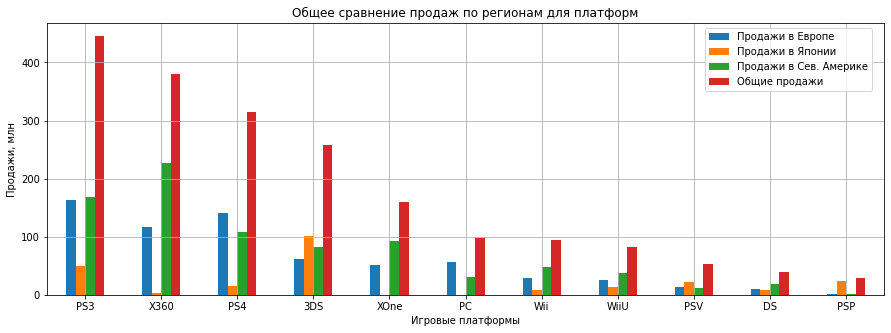

In [77]:
actual_platforms_region.plot.bar(rot=0, figsize=(15,5))
plt.title('Общее сравнение продаж по регионам для платформ')
plt.xlabel('Игровые платформы')
plt.ylabel('Продажи, млн')
plt.grid()
plt.legend(['Продажи в Европе', 'Продажи в Японии', 'Продажи в Сев. Америке', 'Общие продажи'],
          loc="upper left",
          bbox_to_anchor=(0.78, 0, 0.1, 1))
plt.show()

Выведем top-5 продаж по регионам

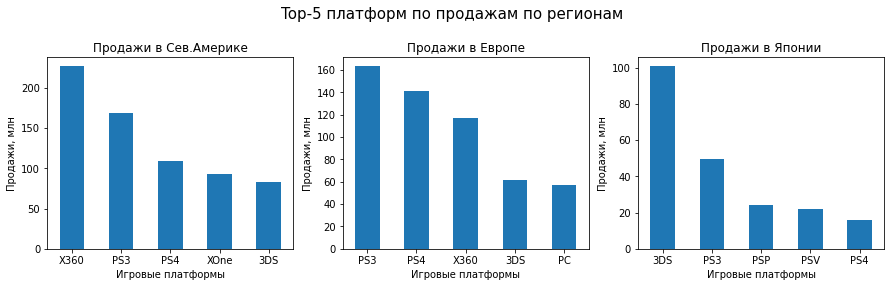

In [78]:
title = ['Продажи в Сев.Америке', 'Продажи в Европе', 'Продажи в Японии']
cols = ['na_sales', 'eu_sales', 'jp_sales']
fig, ax = plt.subplots(1, len(cols), figsize=(15, 7))
fig.subplots_adjust(bottom = 0.5) 
fig.suptitle("Top-5 платформ по продажам по регионам", fontsize=15)
for i in range(len(cols)):
    (actual_platforms_region.sort_values(by=cols[i], ascending=False).head(5).plot.bar(y = cols[i], rot=0, ax=ax[i])
                            .set(title=title[i], xlabel ='Игровые платформы', ylabel= 'Продажи, млн'))
    ax[i].legend('', frameon=False)
plt.show()

Выведем top-5 продаж по платформам, при этом объединим невошедшие в выборку платформы в группу 'прочие'. Результаты приведем на круговых диаграммах, так как на круговых диаграммах хорошо видны все региональные рынки игр с разбиением на платформы.

In [79]:
actual_platforms_region

,eu_sales,jp_sales,na_sales,total_sales
platform,,,,
PS3,163.09,49.39,168.26,445.56
X360,117.10,3.35,226.80,380.38
PS4,141.09,15.96,108.74,314.14
3DS,61.27,100.62,82.65,257.81
XOne,51.59,0.34,93.12,159.32
PC,56.95,0.00,29.94,98.03
Wii,29.60,8.97,48.56,95.02
WiiU,25.13,13.01,38.10,82.19
PSV,13.07,21.84,12.47,53.81


C:\Users\ans\AppData\Local\Temp\ipykernel_14172\2501349866.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  right_order =right_order.append(pd.Series([right_order.iloc[5:leng-1].sum(axis = 0)], index=['Others']))
C:\Users\ans\AppData\Local\Temp\ipykernel_14172\2501349866.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  right_order =right_order.append(pd.Series([right_order.iloc[5:leng-1].sum(axis = 0)], index=['Others']))
C:\Users\ans\AppData\Local\Temp\ipykernel_14172\2501349866.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  right_order =right_order.append(pd.Series([right_order.iloc[5:leng-1].sum(axis = 0)], index=['Others']))


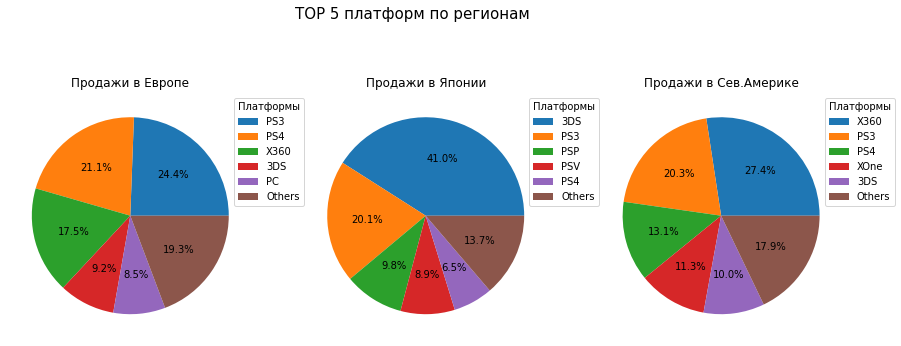

In [80]:
title = ['Продажи в Европе', 'Продажи в Японии', 'Продажи в Сев.Америке']
leng = actual_platforms_region.shape[0]
fig, ax = plt.subplots(1, 3, figsize=(15, 10))
fig.subplots_adjust(bottom = 0.5) 
fig.suptitle('TOP 5 платформ по регионам', fontsize=15)
for i in range(3):
    col = actual_platforms_region.columns[i]
    right_order = actual_platforms_region[col].sort_values(ascending=False)
    right_order =right_order.append(pd.Series([right_order.iloc[5:leng-1].sum(axis = 0)], index=['Others']))
    right_order = right_order.iloc[[0, 1, 2, 3, 4, leng]]
    ax[i].pie(right_order, autopct='%1.1f%%')
    #right_order.plot(kind="pie", ax=ax[i], legend=False, title = str(col));
    ax[i].legend(right_order.index,
          title="Платформы",
          loc="upper left",
          bbox_to_anchor=(0.9, 0, 0.1, 1))
    ax[i].set_title(title[i])
plt.show()

**Результаты и Выводы**

* В топ-5 платформ для региона NA входят   X360,  PS3, PS4, XOne, 3DS;
* В топ-5 платформ для региона EU входят  PS3, PS4, X360, 3DS, PC;
* В топ-5 платформ для региона JP входят  3DS, PS3,  PSP, PSV, PS4.

**3.2 Самые популярные жанры (топ-5) - Поясните разницу для пользователя каждого региона (NA, EU, JP)**

In [81]:
actual_genre_region = (actual_games.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales', 'total_sales'], aggfunc='sum')
                                       .sort_values(by='total_sales', ascending=False))

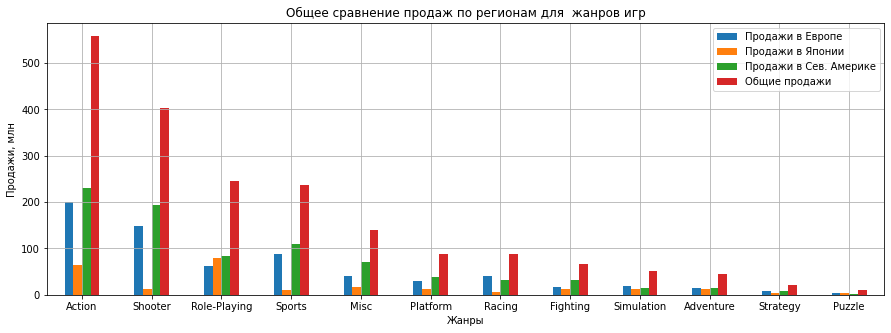

In [82]:

actual_genre_region.plot.bar(rot=0, figsize=(15,5))
plt.title('Общее сравнение продаж по регионам для  жанров игр')
plt.xlabel('Жанры')
plt.ylabel('Продажи, млн')
plt.legend(['Продажи в Европе', 'Продажи в Японии', 'Продажи в Сев. Америке', 'Общие продажи'],
          loc="upper left",
          bbox_to_anchor=(0.79, 0, 0.1, 1))
plt.grid()
plt.show()

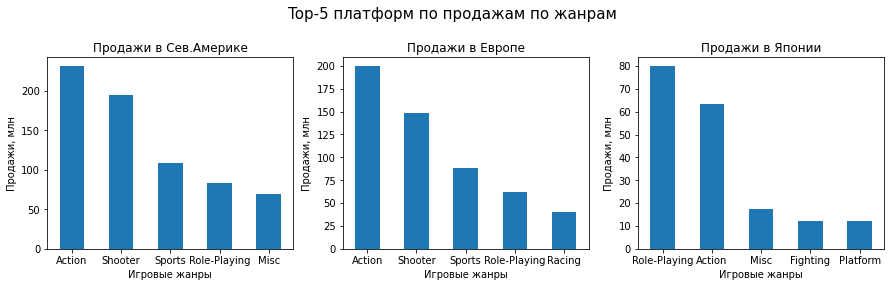

In [83]:
title = ['Продажи в Сев.Америке', 'Продажи в Европе', 'Продажи в Японии']
cols = ['na_sales', 'eu_sales', 'jp_sales']
fig, ax = plt.subplots(1, len(cols), figsize=(15, 7))
fig.subplots_adjust(bottom = 0.5) 
fig.suptitle("Top-5 платформ по продажам по жанрам", fontsize=15)
for i in range(len(cols)):
    (actual_genre_region.sort_values(by=cols[i], ascending=False).head(5).plot.bar(y = cols[i], rot=0, ax=ax[i])
                            .set(title=title[i], xlabel ='Игровые жанры', ylabel= 'Продажи, млн'))
    ax[i].legend('', frameon=False)
plt.show()

Выведем top-5 продаж по жанрам, при этом объединим невошедшие в выборку жанры в группу 'прочие'. Результаты приведем на круговых диаграммах, так как на круговых диаграммах хорошо видны все региональные рынки игр с разбиением на жанры.

C:\Users\ans\AppData\Local\Temp\ipykernel_14172\1698089167.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  right_order =right_order.append(pd.Series([right_order.iloc[5:leng-1].sum(axis = 0)], index=['Others']))
C:\Users\ans\AppData\Local\Temp\ipykernel_14172\1698089167.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  right_order =right_order.append(pd.Series([right_order.iloc[5:leng-1].sum(axis = 0)], index=['Others']))
C:\Users\ans\AppData\Local\Temp\ipykernel_14172\1698089167.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  right_order =right_order.append(pd.Series([right_order.iloc[5:leng-1].sum(axis = 0)], index=['Others']))


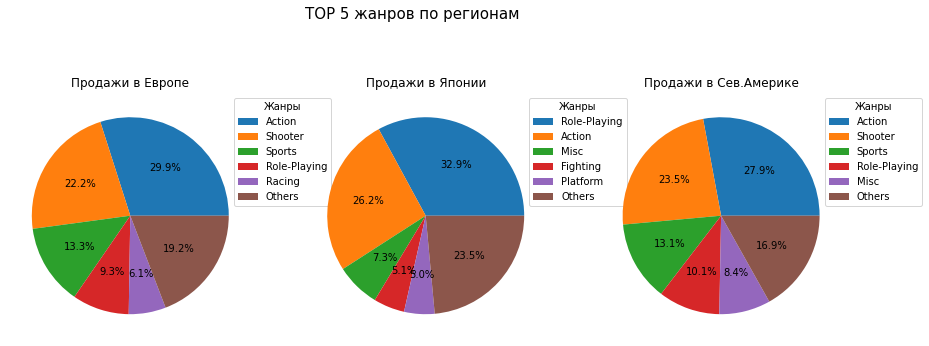

In [84]:
title = ['Продажи в Европе', 'Продажи в Японии', 'Продажи в Сев.Америке']
leng = actual_genre_region.shape[0]
fig, ax = plt.subplots(1, 3, figsize=(15, 10))
fig.subplots_adjust(bottom = 0.5) 
fig.suptitle('TOP 5 жанров по регионам', fontsize=15)
for i in range(3):
    col = actual_genre_region.columns[i]
    right_order = actual_genre_region[col].sort_values(ascending=False)
    right_order =right_order.append(pd.Series([right_order.iloc[5:leng-1].sum(axis = 0)], index=['Others']))
    right_order = right_order.iloc[[0, 1, 2, 3, 4, leng]]
    ax[i].pie(right_order, autopct='%1.1f%%')
    #right_order.plot(kind="pie", ax=ax[i], legend=False, title = str(col));
    ax[i].legend(right_order.index,
          title="Жанры",
          loc="upper left",
          bbox_to_anchor=(0.9, 0, 0.1, 1))
    ax[i].set_title(title[i])
plt.show()

**Результаты и Выводы**

* В топ-5 жанров для региона NA входят  action,  shooter, sports, role-playing, misc;
* В топ-5 жанров для региона EU входят  action,  shooter, sports, role-playing, racing;
* В топ-5 жанров для региона JP входят  role-playing, action, misc, fighting, platform;
* Топ-5 жанров в Северной Америке и Европе практически совпадает action,  shooter, sports, role-playing, за исключением последнего места, которое в Северной Америке занимает misc, а в Европе racing.
* В Японии же распределение жанров по 5 первым местам совсем другое: role-playing занимает первое место, на втором action, на третьем  misc, на последнем месте нефигурировавшая ранее platform и на предпоследнем fighting;
* Таким образом, shooter хороший выбор для европейского и американского рынка, но на японском практически не представлен;
* Жанр спорт консервативно представлен на всех трех рынках занимая от 13.3 %(европейском - ну прям точно FIFA, но проверять не будем) до 7.5% (на японском).


**3.3 Влияет ли рейтинг ESRB на продажи в отдельном регионе (NA, EU, JP)**

Сгруппируем по рейтинга, уберем из рассмотрения «RP» («Rating Pending»). Для того чтобы учесть отсутствие рейтинга, в том числе из-за отсутствия необходимости в его присваивании в регионах EU и JP, следует поменять пропуски с NaN на какие-либо значения, например ........... NaN - чтобы pandas смог их обработать и свести в отдельную группу. 
 * Так как столбец текстовый, такое вполне возможно и не изменяет смысла происходящего;
 * В начале обговаривалось, что достаточно много ячеек с пропусками совпадают в графе rating и critic_score, может быть для таких случаев можно было бы предлоложить, что рейтинг не присвоен и обозначить эти значения по другому "not_defined". Но так как береться все и сразу, то и такое имя подходит.

In [85]:
actual_games_rating_filled = actual_games.fillna('NaN')
actual_games_rating_filled.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,21.05,97.0,8.2,M
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,16.27,97.0,8.1,M
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,9.04,4.24,0.13,1.32,14.73,88.0,3.4,M
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,14.63,NaN,NaN,NaN
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,14.60,NaN,NaN,NaN


In [86]:
actual_rating_region = (actual_games_rating_filled.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales', 'total_sales'], aggfunc='sum')
                                       .sort_values(by='total_sales', ascending=False))
actual_rating_region = actual_rating_region.drop('RP')
actual_rating_region

,eu_sales,jp_sales,na_sales,total_sales
rating,,,,
M,250.51,26.14,308.51,667.16
NaN,116.59,138.18,123.69,412.37
E,141.65,36.62,170.09,389.19
T,83.12,33.39,109.26,253.93
E10+,78.00,11.23,117.72,230.86
EC,0.00,0.00,0.42,0.45


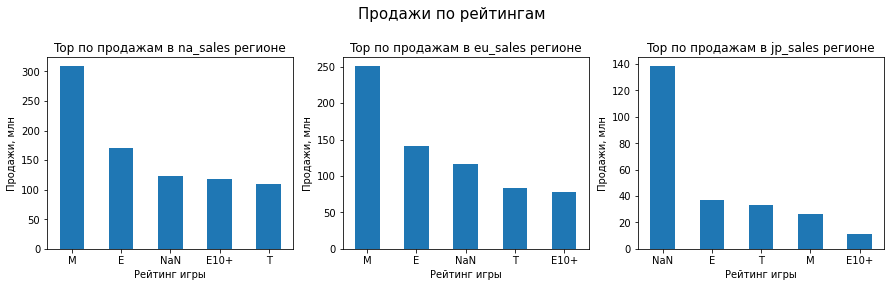

In [87]:
cols = ['na_sales', 'eu_sales', 'jp_sales']
fig, ax = plt.subplots(1, len(cols), figsize=(15, 7))
fig.subplots_adjust(bottom = 0.5) 
fig.suptitle("Продажи по рейтингам", fontsize=15)
for i in range(len(cols)):
    (actual_rating_region.sort_values(by=cols[i], ascending=False).head(5).plot.bar(y = cols[i], rot=0, ax=ax[i])
                            .set(title='Top по продажам в '+cols[i] +' регионе', xlabel ='Рейтинг игры', ylabel= 'Продажи, млн'))
    ax[i].legend('', frameon=False)
plt.show()

Выведем продажb по рейтингам. Результаты приведем на круговых диаграммах, так как на круговых диаграммах хорошо видны все региональные рынки игр с разбиением на рейтингам.

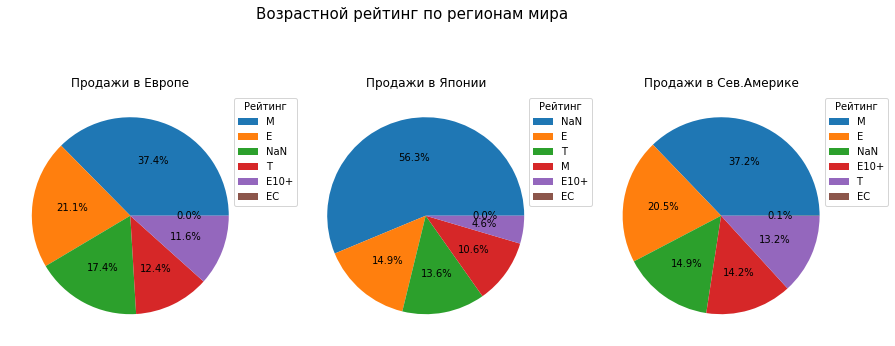

In [88]:
title = ['Продажи в Европе', 'Продажи в Японии', 'Продажи в Сев.Америке']
leng = actual_rating_region.shape[0]
fig, ax = plt.subplots(1, 3, figsize=(15, 10))
fig.subplots_adjust(bottom = 0.5) 
fig.suptitle('Возрастной рейтинг по регионам мира', fontsize=15)
for i in range(3):
    col = actual_rating_region.columns[i]
    right_order = actual_rating_region[col].sort_values(ascending=False)
    ax[i].pie(right_order, autopct='%1.1f%%')
    #right_order.plot(kind="pie", ax=ax[i], legend=False, title = str(col));
    ax[i].legend(right_order.index,
          title="Рейтинг",
          loc="upper left",
          bbox_to_anchor=(0.9, 0, 0.1, 1))
    ax[i].set_title(title[i])
plt.show()

**Результаты и Выводы**

* В Европе и Северной Америке лидируют игры с рейтингом M  для лиц старше 17 лет, далее E "Для всех";
* Рейтинги «E10+» и «T» («Teen») в Европе и Америке меняются местами;
* В Японии лидируют игры с рейтингом Nan, "E" "Для всех" и далее «T» («Teen») — «Подросткам;
* Далее в Японии идут «M» («Mature») — «Для взрослых» и  «E10+» («Everyone 10 and older»);
* Рынки в Европе и Америке во многом похожи, Япония отличается;
* Так как в Японии лидирует рейтинг NaN, это скорее всего говорит, что игр создаются для локального пользования, другие приоритеты в играх так же подчеркивают этот факт;
* Для всех рынков свойственная ориентация на молодежь и подростков, только в Японии контент для более взрослой аудитории пользуется относительным успех.

In [89]:
# Комментарий ревьюера
temp = actual_games.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

1705 0.4246575342465753


M       623
T       615
E       614
E10+    456
EC        1
RP        1
Name: rating, dtype: int64

### Проверьте гипотез:

**4.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Конвенциональные значения статистической значимости 1% и 5%. Выберем величину alpha = 5%.

Проверим гипотезу о том, что пользовательские рейтинги платформ Xbox One и PC одинаковые:

- Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC **одинаковые**.
- Альтернативная гипотеза: среднее значение пользовательские рейтинги платформ Xbox One и PC **неодинаковые**

Подготовим данные для анализа

In [90]:
xone_rate = actual_games.query("(platform == 'XOne') & (user_score == user_score)")['user_score']
pc_rate = actual_games.query("(platform == 'PC') & (user_score == user_score)")['user_score']

In [91]:
alpha = 0.05
results = st.ttest_ind(xone_rate, pc_rate, alternative='two-sided')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем H0 гипотезу')
else:
    print('Нет оснований отвергнуть H0 гипотезу')

p-value: 0.6601032732708916
Нет оснований отвергнуть H0 гипотезу


Нет основания говорить, что то пользовательские рейтинги платформ Xbox One и PC **неодинаковые**.

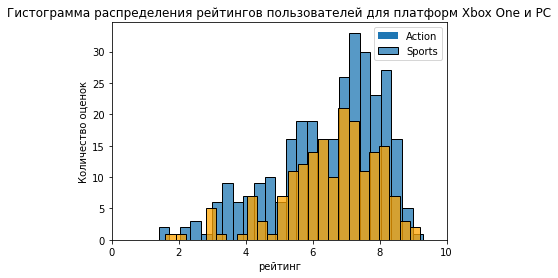

In [92]:
sns.histplot(data =pc_rate, bins=25).set(xlim= [0,10])
sns.histplot(data =xone_rate, bins=25, color = 'orange').set(xlim= [0,10]);
plt.title('Гистограмма распределения рейтингов пользователей для платформ Xbox One и PC')
plt.xlabel('рейтинг')
plt.ylabel('Количество оценок');
plt.legend(labels=['Action','Sports'])
plt.show()

**4.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные**

Проверим гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные:

- Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports **одинаковые**.
- Альтернативная гипотеза: среднее значение пользовательские рейтинги жанров Action и Sports **неодинаковые**

Подготовим данные для анализа

In [93]:
action_rate = actual_games.query("(genre == 'Action') & (user_score == user_score)")['user_score']
sports_rate = actual_games.query("(genre == 'Sports') & (user_score == user_score)")['user_score']

In [94]:
alpha = 0.05
results = st.ttest_ind(action_rate, sports_rate, alternative='two-sided')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем H0 гипотезу')
else:
    print('Нет оснований отвергнуть H0 гипотезу')

p-value: 6.602684222218741e-24
Отвергаем H0 гипотезу


На имеющихся данных, на уровне значимости alfa =5% есть основания **отвергнуть нулевую гипотезу** о равенстве средних значений пользовательских рейтингов жанров Action и Sports в пользу альтернативной гипотезы

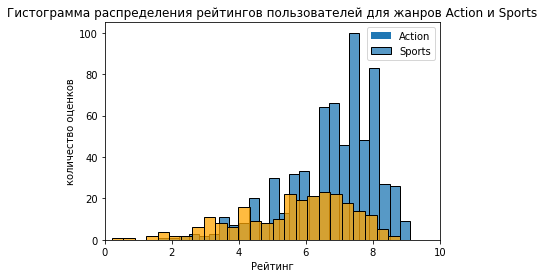

In [95]:
sns.histplot(data =action_rate, bins=25).set(xlim= [0,10]);
sns.histplot(data =sports_rate, bins=25, color = 'orange').set(xlim= [0,10]);
plt.legend(labels=['Action','Sports'])
plt.title('Гистограмма распределения рейтингов пользователей для жанров Action и Sports')
plt.xlabel('Рейтинг')
plt.ylabel('количество оценков')
plt.show()

**Результаты и Выводы**

* При тестировании гипотез использовался t-критерий потому, что он работает для выборки любого размера, в том числе при n<=30 (Свойство распределения Стьюдента);
* Величина статистической значимости принята равной 5%, что является конвенциональным значением;
* Нулевая гипотеза всегда формулируется как строго равенство, альтернативная - двухстороннее или одностороннее неравенство.
1. В рамках проверки пользовательских платформ сформулированы следующие гипотезы:
    * Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC **одинаковые**
    * Альтернативная гипотеза: среднее значение пользовательские рейтинги платформ Xbox One и PC **неодинаковые**
    
Для проверки гипотезы использовался двусторонний t-тест для независимых выборок st.ttest_ind()
    
Полученное значение p-value говорит о том, что хотя средние пользовательские рейтинги платформ Xbox One и PC и неодинаковы, с вероятностью в 66% различие можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними пользовательскими рейтингами.

2. В рамках проверки средних пользовательских рейтингов жанров сформулированы следующие гипотезы:
    * Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports **одинаковые**.
    * Альтернативная гипотеза: среднее значение пользовательские рейтинги жанров Action и Sports **неодинаковые**
    
Для проверки гипотезы использовался двусторонний t-тест для независимых выборок st.ttest_ind()

Полученное значение p-value говорит о том, что средние пользовательские рейтинги жанров Action и Sports неодинаковы и с вероятностью в 0% различие можно получить случайно. Это малая вероятность, поэтому отвергаем нулевую гипотезу в пользу альтернативной: "Средние пользовательские рейтинги жанров Action  и Sports **неодинаковые**"

### Сделать выводы про проведенной работе:

1. **Подготовка данных**
   * Выполнена загрузка данных;
   * В таблице отсутствуют явные дубликаты;
   * Удалено 3 неявнях дубликата;
   * Названия столбцов стандартизированы и приведены к нижнему регистру;
   * Для столбца "year_of_release" 17 значений восстановлены на основании названия игры;
   * Для столбца "rating" значения более старого рейтинга "K-A" заменины на более новые значения «E»;
   * Столбцы "year_of_release", "critic_score" приведены к формату float32;
   * Столбец "user_score" приведен к формату float32;
   * Значения 'tbd' в стоблце заменены на NaN;
   * Добавлен столбец "total_sales" с суммарной выручкой по игре;
   * Отмечено, что в таблице отдельно представлены игры с одинаковым названием, но вышедшие на разных платформах.
2. **Исследовательский анализ данных**
   * Максимальное количество игр соответствует периоду с 2003 по 2010 год (IRQ диапазон). Выбросами являются игры, выпущенные до 1994 года. С 2003 года до 2010 года (здесь половина всех значений) наблюдается резкий всплеск до максимального значения, после чего происходит снижение прибыли;
   * К 2016 году все top-10 платформ прошли максимум прибыли(стадия зрелости) и находятся в конце стадии спада (в рамках терминологии жизненного цикла продукта). Только PS4 пройдя максимум продаж активно приносит деньги. Отдельно следует отметить игры под компьютер, которые следует рассматривать отдельно;
   * В top-10 платформ по доходу входят: 'Wii', 'DS', 'X360', 'PS3', 'PS2', 'GBA', 'PS4', 'PS', 'PC', 'PSP';
   * На 2016 год еще в активной стадии продаж - XOne, 3DS, PS4 (прибыль больше 10 млн.);
   * Среднее время жизни платформы из top-10: 8.0 лет;
   * Среднее время выхода на пик продаж платформы из top-10: 3.375 лет;
   * Среднее время спада платформы из top-10: 4.625;
   * Можно выделить следующие классы платформ:
       - "старые" - основное количество игр приходится на годы до 1995;
       - "устаревшие"  - основное количество игр(и доход) приходится на годы с 2000 до 2010;
       - "современные" - основное количество игр(и доход) приходится на годы с 2007 до 2016;
       - "новейшие"    - запущенные после 2011 года.
   * Среднее время жизненного цикла для всех платформ меньше относительно top-10, что скорее всего это связано с тем, что платформы с меньшей прибылью имеют более короткий срок существования на рынке;
   * Актуальным периодом может считаться период от начала спада продаж в группе "современные" платформы(для всех платформ) и до начала появления "новейших" (PS4 и т.д.)   - что соответствует  2011 году;
   * Распределение по сумме продаж платформами следующее в порядке убывания: PS3, X360, PS4, 3DS, XOne, PC, Wii, WiiU, PSV, DS, PSP, из них на стадии спада: PS3, X360, 3DS, PC, Wii, WiiU, PSV, DS, PSP;
   * В качестве наиболее прибыльных можно остановится на X360, PS4 и 3DS, хотя последняя и падает, но у нее очень долгая относительно других продолжительность существования на рынки и скорость спада опять же относительно других самая маленькая;
   * "Длинная" история 3DS так же способствует хорошей прогнозируемости результатов (доход будет, но стабильно невысокий, но будет);
   * Для общих продаж (in total): Медиана составляет 130 тыс, среднее - 486 тыс. Первый квартиль - 40 тыс, третий квартиль - 410 тыс. Стандартное отклонение - 1.22 млн. Максимальное Данные значительно смещены вправо - среднее больше чем медиана;
   * Выручка по каждой платформе: Платформы с самым широким распределением суммы отдельных продаж - 'X360', 'PS3', 'PS4', 'XOne'. Минимальный разброс данных характерен для платформ 'PSV', 'PSP' и 'DS'. Максимальное значение медианы у 'X360', минимальное  - 'PSP';
   * Влияние мнения критиков варьируется от 0.51 для PS3 до 0.178662 для PSV;
   * Мнение пользователей более неоднозначное: максимальное влияние для Wii(и сопоставимо с мнение критиков): 0.165039, практически не оказывает влияние для PC, PS4, XOne, PSV и DS;
   * Для PSP положительные оценки отрицательно влияют на продажи;
   * Для пяти платформ по продажам наблюдается устойчивая корреляция отзывов критиков и объемов продаж. Коэффициент корреляции от 0.42(XOne) до 0.35(у 3DS);
   * Связь продаж с отзывами зрителей противоречива и находится в диапазоне от отрицательной велчиины -0.1(XOne) до 0.22(3DS);
   * При этом только для платформы 3DS она чувствительна, в других случаях ей можно пренебречь.
   * В порядке убывания средней доходности жанры расположены следующим образов: Shooter	Sports	Platform	Fighting	Racing	Role-Playing	Action	Misc	Simulation	Strategy	Puzzle	Adventure;
   * Для следующих жанров средняя доходность выше средней:  Shooter	Sports	Platform	Fighting	Racing	Role-Playing;
* Для следующих жанров средняя доходность равна средней:  Action	Misc;
* Следующие жанры со средней доходностью ниже среднего:   Simulation	Strategy	Puzzle	Adventure;
* Рассматривая top - 3 игр по средней доходности, дополнительно можно соотнести с долей игр на рынке:
    * Количество Sports сильно меняется год от года - скорее всего это связано с периодичностью спортивных событий и соответственна интересу к ним, в этой связи кстати может быть и быстрая потеря актуальности;
    * Относительное количество игр Platform мало, скорее всего рынок узок и пользователи проявляют постоянство во вкусах (а может быть будут рады чему то новому);
    * Наиболее рационально ориентироваться на Shooter - средние доходы высоки, стабильная доля выпуска игр. 
3.  **Портрет пользователя каждого региона**
     * Снижаются удельные доли музыкальных игр, пазлов и экшенов, хотя последние все еще доминируют на рынке.
     * В топ-5 платформ для региона NA входят   X360,  PS3, PS4, XOne, 3DS;
     * В топ-5 платформ для региона EU входят  PS3, PS4, X360, 3DS, PC;
     * В топ-5 платформ для региона JP входят  3DS, PS3,  PSP, PSV, PS4;
     * В топ-5 жанров для региона NA входят  action,  shooter, sports, role-playing, misc;
     * В топ-5 жанров для региона EU входят  action,  shooter, sports, role-playing, racing;
     * В топ-5 жанров для региона JP входят  role-playing, action, misc, fighting, platform;
     * Топ-5 жанров в Северной Америке и Европе практически совпадает action,  shooter, sports, role-playing, за исключением последнего места, которое в Северной Америке занимает misc, а в Европе racing.
     * В Японии же распределение жанров по 5 первым местам совсем другое: role-playing занимает первое место, на втором action, на третьем  misc, на последнем месте нефигурировавшая ранее platform и на предпоследнем fighting;
     * Таким образом, shooter хороший выбор для европейского и американского рынка, но на японском практически не представлен;
     * Жанр спорт консервативно представлен на всех трех рынках занимая от 13.3 %(европейском - ну прям точно FIFA, но проверять не будем) до 7.5% (на японском);     
     * В Европе и Северной Америке лидируют игры с рейтингом M  для лиц старше 17 лет, далее E "Для всех";
     * Рейтинги «E10+» и «T» («Teen») в Европе и Америке меняются местами;
     * В Японии лидируют игры с рейтингом Nan, "E" "Для всех" и далее «T» («Teen») — «Подросткам;
     * Далее в Японии идут «M» («Mature») — «Для взрослых» и  «E10+» («Everyone 10 and older»);
     * Рынки в Европе и Америке во многом похожи, Япония отличается;
     * Так как в Японии лидирует рейтинг NaN, это скорее всего говорит, что игр создаются для локального пользования, другие приоритеты в играх так же подчеркивают этот факт;
     * Для всех рынков свойственная ориентация на молодежь и подростков, только в Японии контент для более взрослой аудитории пользуется относительным успех.
4.  **Проверьте гипотез**
     * Проверка гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Результат: **Нет основания говорить, что то пользовательские рейтинги платформ Xbox One и PC неодинаковые**;
     * Проверка гипотезы: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Результат: **Нет оснований говорить, что среднее значение пользовательские рейтинги жанров Action и Sports одинаковые**.

**Рекомендации по потенциально популярному продукту при анализе актуального периода рынка с 2011 по 2016 годы:**
 * Приоритет Северо-Американского и Европейского рынка игр;
 * Платформы X360, PS4 и 3DS;
 * Жанры  - лучше всего ориентироваться на Shooter, но и Sports (особенно к знаковым спортивным событиям будет хороший выбор), а так же	Platform;
 * По возрастным рейтингам при выборе продука следует ориентироваться на  M  E «E10+» и «T»;
 * При выборе игры следует обратить внимание на рейтинг критиков.
 
 
